<a href="https://colab.research.google.com/github/zoraizmohammad/dukeClasses/blob/main/sta240/finalProject/STA240FinalSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***STA240 Final Project***
Completed by: Mohammad Zoraiz & Sylvester Johannes Arizie


# ***General Tasks***
This project is intended as a simulation case study that applies the concepts you learned in class as well as the computational tools you learned in lab. Much of your work will be in coding up a simulation framework that realistically simulates the arrival, service and waiting
times of customers in your business. You might wish to try the following steps to set up the simulator for the base scenario 1 (see below):
1. Code a subprocedure that simulates the arrival times of customers throughout the day.
2. Code a subprocedure that, given output from (a), simulates the serving times of these
customers before they leave.
3. Given output from (a) and (b), code a subprocedure that tells you at a given time point, how many customers are waiting in line, how many customers are being served, and whether the restaurant is experiencing down-time.
4. You can build upon these subprocedures to construct more elaborate and realistic simulation workflows for your restaurant, e.g., Scenario 2 and other scenarios you wish to explore.

Students in prior classes have found it useful to drop by office hours to seek help on coding, so you are more than welcome to do that – we’re here to help!

Project Preview: https://drive.google.com/file/d/1IqlXxooZe8gVvy2u_euSSERWRLfRDYrz/view?usp=sharing

# **Scenario  1**
Consider the simple setting with one dining table and one chef, with operating
hours 10am - 10pm. Suppose customers arrive according to a Poisson process with a rate of λ<sub>A</sub> = 5 per hour. Once a customer arrives, their total service time (ordering, cooking and eating) can be modeled by an exponential distribution with rate λ<sub>S</sub> = 6.

*Note:* It is reasonable to assume waiting and service times for each customer are independently distributed. If a customer arrives and the dining table is occupied, then they would wait in line until the table is vacant.



**1. Arrival TIme Subprocedure**

In [ ]:
generate_arrival_times <- function(lambda, start_hour, end_hour) {
  total_time <- (end_hour - start_hour) * 60 # Convert hours to minutes
  arrivals <- cumsum(rexp(ceiling(lambda * total_time / 60), rate = lambda / 60))
  arrivals <- arrivals[arrivals <= total_time] # Only include arrivals within operating hours

  # Convert minutes to time in AM/PM format
  arrival_times <- format(as.POSIXct((start_hour * 60 + arrivals) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  return(arrival_times)
}

# Example
lambda_A <- 5
start_hour <- 10
end_hour <- 22
arrival_times <- generate_arrival_times(lambda_A, start_hour, end_hour)
print(arrival_times)

 [1] "10:14 AM" "10:33 AM" "10:51 AM" "11:10 AM" "11:10 AM" "11:17 AM"
 [7] "11:43 AM" "11:49 AM" "11:52 AM" "12:24 PM" "12:38 PM" "12:48 PM"
[13] "12:55 PM" "01:10 PM" "01:17 PM" "01:31 PM" "01:36 PM" "03:03 PM"
[19] "03:13 PM" "03:15 PM" "03:29 PM" "03:56 PM" "04:12 PM" "04:19 PM"
[25] "04:52 PM" "05:07 PM" "05:08 PM" "05:12 PM" "05:25 PM" "05:29 PM"
[31] "05:40 PM" "06:03 PM" "06:10 PM" "06:41 PM" "06:53 PM" "07:06 PM"
[37] "07:18 PM" "07:21 PM" "07:40 PM" "07:41 PM" "07:42 PM" "07:43 PM"
[43] "07:46 PM" "07:50 PM" "08:02 PM" "08:13 PM" "08:32 PM" "08:52 PM"
[49] "09:22 PM" "09:40 PM" "09:45 PM" "09:48 PM" "09:53 PM" "09:54 PM"
[55] "09:58 PM"


**2. Serving time simulation of these customers before they leave.**

In [ ]:
generate_service_times <- function(lambda, num_customers, arrival_times, start_hour) {
  # Generate service times in minutes
  service_times <- rexp(num_customers, rate = lambda) * 60 # Convert hours to minutes

  # Calculate start and end times
  start_times <- sapply(arrival_times, function(at) {
    as.numeric(difftime(as.POSIXct(at, format = "%I:%M %p", tz = "UTC"),
                        as.POSIXct(start_hour * 60 * 60, origin = "1970-01-01", tz = "UTC"),
                        units = "mins"))
  })

  end_times <- start_times + service_times

  # Convert end times to formatted time
  end_times_formatted <- format(as.POSIXct((start_hour * 60 + end_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")

  list(
    service_times = service_times,
    end_times_formatted = end_times_formatted
  )
}

# Example
lambda_S <- 6
num_customers <- length(arrival_times)
service_times_result <- generate_service_times(lambda_S, num_customers, arrival_times, start_hour)

print(service_times_result$service_times)  # Raw service times in minutes
print(service_times_result$end_times_formatted)  # End times in AM/PM format

 [1]  6.85458638 14.39452626 17.31153984 12.44783300 14.63300560 15.37393979
 [7]  0.04599127 11.08765468  2.99970318 11.92003007 11.14928704  0.67375891
[13]  4.80668721 15.70454339  2.59946107 18.56922287  4.63219621  2.36035747
[19] 11.82099421  0.59671372  4.03238441  9.42939840  4.16580644  7.53218405
[25]  1.88686388  8.76853871  1.90037821  9.79078206  3.23375827 13.20477554
[31]  3.18460648 16.05067296  1.45734116 18.03129319  0.30059454 13.03440549
[37]  1.99792245 17.51456242 17.63668332  8.43043578  3.48752776 32.97824800
[43]  4.01706175 11.00701734 13.28923172  6.41902648  1.95833715  4.56788857
[49]  3.72750164 34.63594891 12.74027719 10.81485151  2.96959161  0.84160734
[55] 29.53400917
  10:14 AM   10:33 AM   10:51 AM   11:10 AM   11:10 AM   11:17 AM   11:43 AM 
"10:20 AM" "10:47 AM" "11:08 AM" "11:22 AM" "11:24 AM" "11:32 AM" "11:43 AM" 
  11:49 AM   11:52 AM   12:24 PM   12:38 PM   12:48 PM   12:55 PM   01:10 PM 
"12:00 PM" "11:54 AM" "12:35 PM" "12:49 PM" "12:48 PM" "

**3. At a given time point, how many customers are waiting in line, how many customers are being served, and whether the restaurant is experiencing down-time.**

In [ ]:
simulate_restaurant <- function(arrival_times, service_times, start_hour) {
  n <- length(arrival_times)
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0 # When the table becomes available
  downtime <- 0 # Accumulate downtime

  for (i in 1:n) {
    # Convert arrival time to minutes since the start of the day
    arrival_in_minutes <- as.numeric(difftime(as.POSIXct(arrival_times[i], format = "%I:%M %p", tz = "UTC"),
                                              as.POSIXct(start_hour * 60 * 60, origin = "1970-01-01", tz = "UTC"),
                                              units = "mins"))

    # Calculate downtime if the table is free before the next customer arrives
    if (arrival_in_minutes > table_free_time) {
      downtime <- downtime + (arrival_in_minutes - table_free_time) # Add idle time
      start_times[i] <- arrival_in_minutes # Start serving immediately
    } else {
      # No downtime, customer waits for the table to be free
      start_times[i] <- table_free_time
    }

    # Calculate waiting time
    waiting_times[i] <- start_times[i] - arrival_in_minutes

    # Calculate end time and update when the table will be free
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Convert start and end times to formatted AM/PM
  start_times_formatted <- format(as.POSIXct((start_hour * 60 + start_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  end_times_formatted <- format(as.POSIXct((start_hour * 60 + end_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")

  list(
    arrival_times = arrival_times,
    start_times = start_times_formatted,
    end_times = end_times_formatted,
    waiting_times = waiting_times,
    downtime = downtime # Total downtime in minutes
  )
}

# Example usage
simulation_result <- simulate_restaurant(arrival_times, service_times_result$service_times, start_hour)

# Display the corrected downtime
print(simulation_result)

$arrival_times
 [1] "10:14 AM" "10:33 AM" "10:51 AM" "11:10 AM" "11:10 AM" "11:17 AM"
 [7] "11:43 AM" "11:49 AM" "11:52 AM" "12:24 PM" "12:38 PM" "12:48 PM"
[13] "12:55 PM" "01:10 PM" "01:17 PM" "01:31 PM" "01:36 PM" "03:03 PM"
[19] "03:13 PM" "03:15 PM" "03:29 PM" "03:56 PM" "04:12 PM" "04:19 PM"
[25] "04:52 PM" "05:07 PM" "05:08 PM" "05:12 PM" "05:25 PM" "05:29 PM"
[31] "05:40 PM" "06:03 PM" "06:10 PM" "06:41 PM" "06:53 PM" "07:06 PM"
[37] "07:18 PM" "07:21 PM" "07:40 PM" "07:41 PM" "07:42 PM" "07:43 PM"
[43] "07:46 PM" "07:50 PM" "08:02 PM" "08:13 PM" "08:32 PM" "08:52 PM"
[49] "09:22 PM" "09:40 PM" "09:45 PM" "09:48 PM" "09:53 PM" "09:54 PM"
[55] "09:58 PM"

$start_times
 [1] "10:14 AM" "10:33 AM" "10:51 AM" "11:10 AM" "11:22 AM" "11:37 AM"
 [7] "11:52 AM" "11:52 AM" "12:03 PM" "12:24 PM" "12:38 PM" "12:49 PM"
[13] "12:55 PM" "01:10 PM" "01:25 PM" "01:31 PM" "01:49 PM" "03:03 PM"
[19] "03:13 PM" "03:24 PM" "03:29 PM" "03:56 PM" "04:12 PM" "04:19 PM"
[25] "04:52 PM" "05:07 PM" "05:1

In [ ]:
summarize_simulation <- function(simulation) {
  avg_waiting_time <- mean(simulation$waiting_times)
  total_downtime <- simulation$downtime
  num_customers <- length(simulation$arrival_times)

  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Total Downtime:", total_downtime, "minutes\n")
  cat("Number of Customers Served:", num_customers, "\n")
}

summarize_simulation(simulation_result)

Average Waiting Time: 12.75173 minutes
Total Downtime: 28882357 minutes
Number of Customers Served: 55 


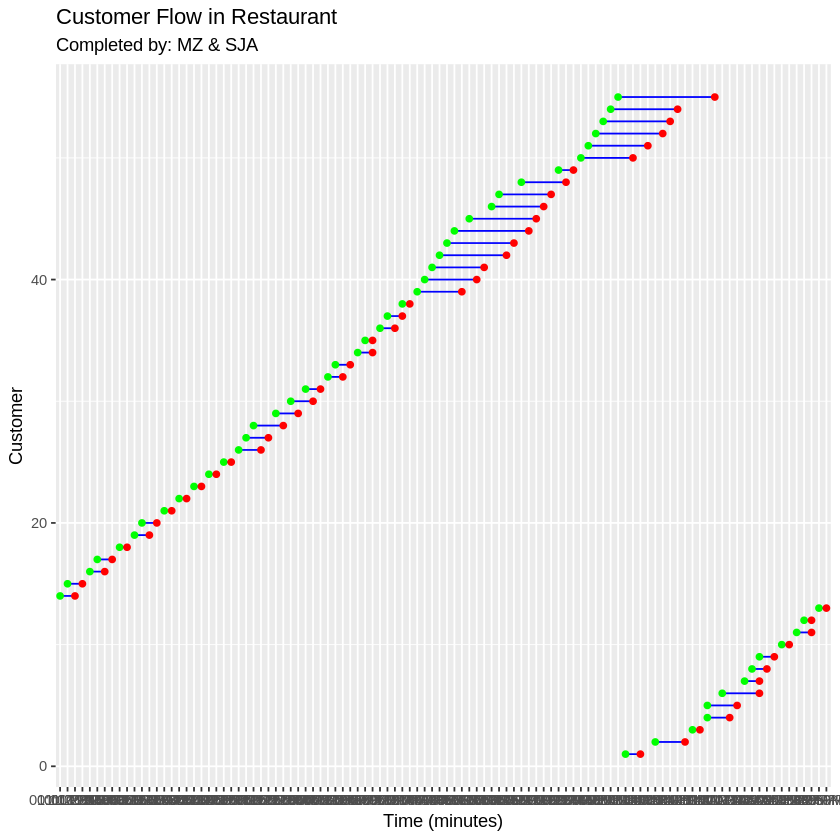

In [ ]:
library(ggplot2)

plot_simulation <- function(simulation) {
  df <- data.frame(
    Customer = 1:length(simulation$arrival_times),
    Arrival = simulation$arrival_times,
    Start = simulation$start_times,
    End = simulation$end_times
  )
  ggplot(df) +
    geom_segment(aes(x = Arrival, xend = End, y = Customer, yend = Customer), color = "blue") +
    geom_point(aes(x = Arrival, y = Customer), color = "green") +
    geom_point(aes(x = End, y = Customer), color = "red") +
    labs(x = "Time (minutes)", y = "Customer", title = "Customer Flow in Restaurant", subtitle = "Completed by: MZ & SJA")
}

plot_simulation(simulation_result)

# **4. Other Possible Scenarios Based Off of Scenario 1**
- ***Sub-scenario 1.2: Two Dining Tables and One Chef***
  - Change: There are now two dining tables, but only one chef. The chef alternates between tables, so only one table can be served at a time.
 - Effect: Customers at one table may have to wait until the chef is free.
- ***Sub-scenario 1.3: VIP Customers with Priority Service***
 - Change: VIP customers (20% of arrivals) get priority over regular customers. VIP customers are always served first, regardless of the queue.
 - Effect: Regular customers might face longer waiting times due to VIPs being prioritized.
- ***Sub-scenario 1.4: Dynamic Service Rates Based on Gamma Distribution
Gamma Distribution***
 - The shape (α) parameter determines how "spread out" the rates are. The scale (β) parameter adjusts the average rate.
 - Gamma distribution models cumulative factors like fatigue, complexity of orders, or efficiency variations during the day.
 - In this example:
    - **Peak Hours** (6-8) Gamma Distribution Parameters (*High Customer Traffic*):
      - *Shape (α=2):* Represents a small number of contributing factors affecting service efficiency (e.g., fatigue and multitasking).
      - *Scale (β=0.2):* Produces a lower mean service rate and more concentrated rates, reflecting that the chef's performance is relatively stable but slower overall during peak hours.
      - *Resulting Service Rates:* Rates are centered around a lower value, with most rates in the range of 0.4 to 1 jobs/hour, meaning the chef handles fewer customers per hour due to higher stress.
    - **Off-Peak Hours** Gamma Distibution Parameters (*Low/Normal Customer Traffic*):
      - *Shape (α=5):*  Represents a larger number of factors contributing to efficiency (e.g., experience, adequate breaks, and fewer distractions).
      - *Scale (β=0.5):*  Produces a higher mean service rate with more variability, reflecting that the chef can handle a broader range of customers efficiently during off-peak times.
      - *Resulting Service Rates:*  Rates are higher and more spread out, typically in the range of 2 to 4 jobs/hour, meaning the chef is more productive and adaptable.



### **Subscenario 1.2: Two Dining Tables with 1 Chef**


Summary Statistics:
Average Waiting Time: 5211.339 minutes
Total Customers Served: 30 
Total Downtime: 11471.05 minutes
   Customer  Arrival    Start      End Waiting_Time
1         1 10:10 AM 10:10 AM 07:50 AM       0.0000
2         2 10:17 AM 10:17 AM 03:21 PM       0.0000
3         3 10:32 AM 03:21 PM 05:56 PM     288.0208
4         4 10:33 AM 05:56 PM 07:54 PM     443.3765
5         5 10:34 AM 07:50 AM 08:08 PM    1276.7824
6         6 10:37 AM 07:54 PM 03:49 AM    1997.0393
7         7 10:41 AM 08:08 PM 02:25 AM    2006.6291
8         8 10:43 AM 02:25 AM 02:58 PM    2382.4539
9         9 11:16 AM 03:49 AM 09:42 AM    2433.2196
10       10 11:16 AM 09:42 AM 09:00 PM    2786.0805
11       11 11:28 AM 02:58 PM 07:10 PM    3090.1159
12       12 11:34 AM 07:10 PM 07:17 PM    3336.5722
13       13 11:37 AM 09:00 PM 05:27 AM    3442.4618
14       14 11:42 AM 05:27 AM 07:42 AM    3945.3696
15       15 11:44 AM 07:42 AM 06:43 PM    4078.4354
16       16 11:54 AM 06:43 PM 05:12 PM    4728.4

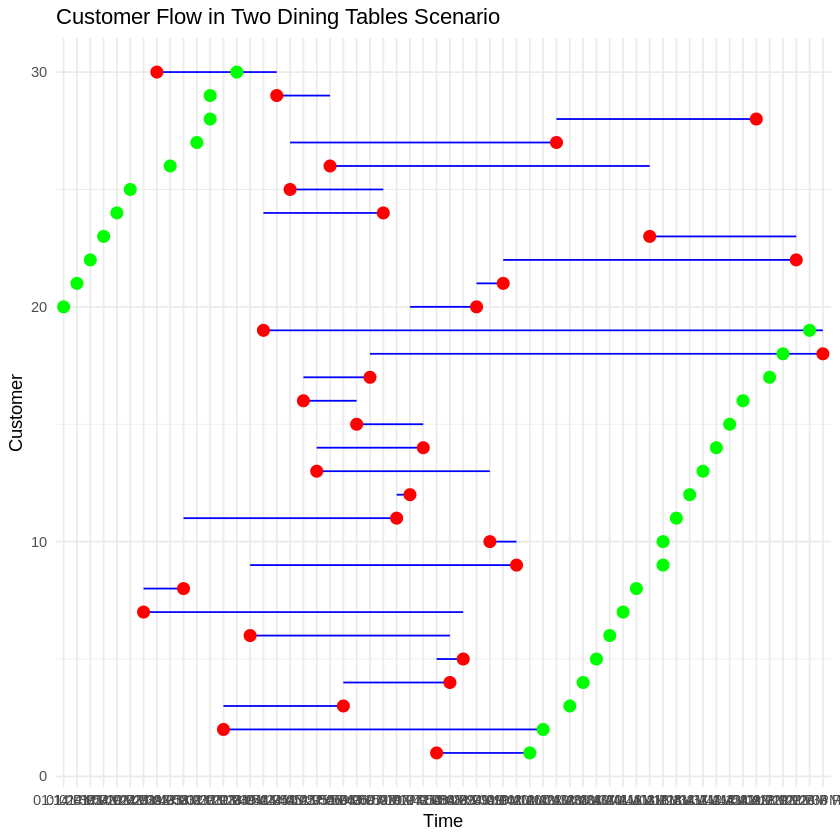

In [ ]:
simulate_two_tables <- function(arrival_times, service_times, start_hour = 10) {
  n <- length(arrival_times)
  table_free_time <- c(0, 0) # Free time for both tables in minutes since start_hour
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)

  for (i in 1:n) {
    # Assign to the table that becomes free first
    assigned_table <- which.min(table_free_time)
    if (arrival_times[i] >= table_free_time[assigned_table]) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time[assigned_table]
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time[assigned_table] <- end_times[i]
  }

  # Convert times to AM/PM format
  format_time <- function(time_in_minutes) {
    format(as.POSIXct((start_hour * 60 + time_in_minutes) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  }
  arrival_times_formatted <- sapply(arrival_times, format_time)
  start_times_formatted <- sapply(start_times, format_time)
  end_times_formatted <- sapply(end_times, format_time)

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times_formatted,
    Start = start_times_formatted,
    End = end_times_formatted,
    Waiting_Time = waiting_times
  )

  # Summary statistics
  avg_waiting_time <- mean(waiting_times)
  total_customers <- n
  total_downtime <- sum(diff(c(0, sort(end_times))) - diff(c(0, sort(arrival_times))))

  # Print summary statistics
  cat("Summary Statistics:\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Total Customers Served:", total_customers, "\n")
  cat("Total Downtime:", total_downtime, "minutes\n")

  return(list(raw_data = raw_data))
}

# Example input data
set.seed(123) # For reproducibility
arrival_times <- cumsum(rexp(30, rate = 5 / 60)) # 30 customers arriving (Poisson process)
service_times <- rexp(30, rate = 1 / 10) * 60 # Service times in minutes

# Simulate and get results
result_two_tables <- simulate_two_tables(arrival_times, service_times)

# Output raw data
print(result_two_tables$raw_data)

# Plot Simulation Data
library(ggplot2)

plot_simulation <- function(simulation_data) {
  ggplot(simulation_data) +
    geom_segment(aes(x = Start, xend = End, y = Customer, yend = Customer), color = "blue") +
    geom_point(aes(x = Arrival, y = Customer), color = "green", size = 3, shape = 21, fill = "green") +
    geom_point(aes(x = End, y = Customer), color = "red", size = 3, shape = 21, fill = "red") +
    labs(
      x = "Time",
      y = "Customer",
      title = "Customer Flow in Two Dining Tables Scenario"
    ) +
    theme_minimal()
}

plot_simulation(result_two_tables$raw_data)

### **Subscenario 1.3: VIP Customers with Priority Service**


Summary Statistics:
Average Waiting Time (Overall): 12252.37 minutes
Average Waiting Time (VIP): 12051.54 minutes
Average Waiting Time (Regular): 12453.21 minutes
   Customer  Arrival    Start      End Waiting_Time Priority
1         1 10:10 AM 10:00 AM 07:40 AM     599.8313  Regular
2         2 10:17 AM 07:40 AM 12:44 PM    1900.4198      VIP
3         3 10:32 AM 12:44 PM 03:20 PM    2204.1235  Regular
4         4 10:33 AM 03:20 PM 05:18 PM    2359.8518      VIP
5         5 10:34 AM 05:18 PM 05:35 AM    3917.9759      VIP
6         6 10:37 AM 05:35 AM 01:30 PM    4655.3280      VIP
7         7 10:41 AM 01:30 PM 07:47 PM    5129.6742  Regular
8         8 10:43 AM 07:47 PM 08:20 AM    5507.2132  Regular
9         9 11:16 AM 08:20 AM 02:13 PM    6259.4526      VIP
10       10 11:16 AM 02:13 PM 01:31 AM    6612.6575  Regular
11       11 11:28 AM 01:31 AM 05:43 AM    7290.0306  Regular
12       12 11:34 AM 05:43 AM 05:50 AM    7542.1534      VIP
13       13 11:37 AM 05:50 AM 02:17 PM   118

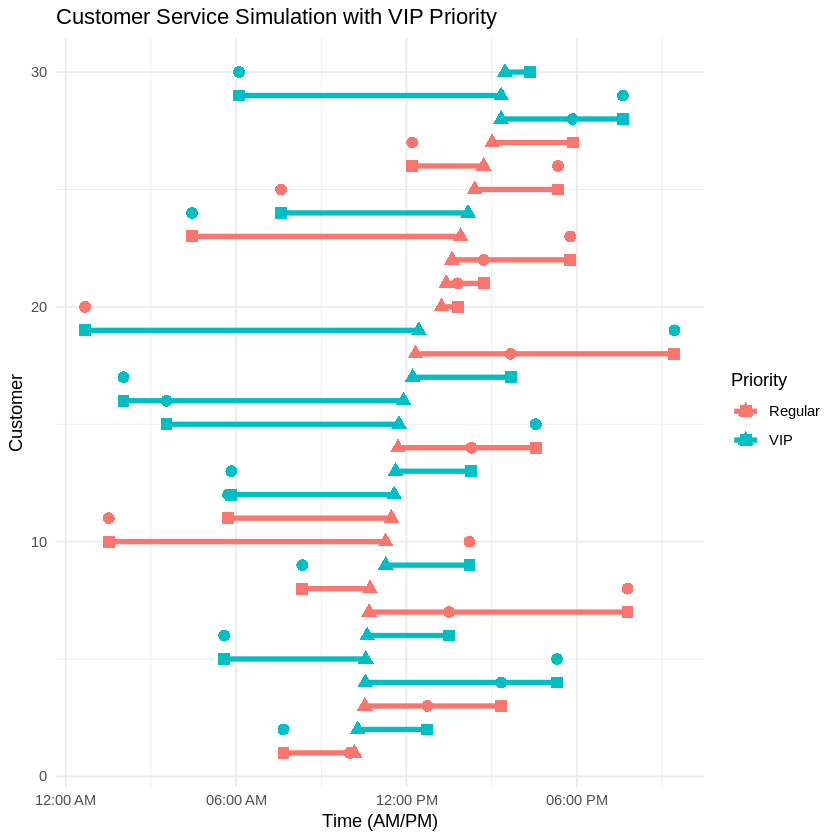

In [ ]:
library(ggplot2)

simulate_vip_priority <- function(arrival_times, service_times, vip_prob = 0.5, start_hour = 10) {
  n <- length(arrival_times)

  # Assign VIP status (1 for VIP, 0 for regular)
  is_vip <- rbinom(n, 1, vip_prob)
  vip_indices <- which(is_vip == 1)
  regular_indices <- which(is_vip == 0)

  # Separate VIP and regular customers
  vip_arrivals <- arrival_times[vip_indices]
  vip_services <- service_times[vip_indices]
  regular_arrivals <- arrival_times[regular_indices]
  regular_services <- service_times[regular_indices]

  # Merge VIPs and regular customers into a priority queue
  all_arrivals <- c(vip_arrivals, regular_arrivals)
  all_services <- c(vip_services, regular_services)
  priorities <- c(rep("VIP", length(vip_arrivals)), rep("Regular", length(regular_arrivals)))
  priority_order <- order(all_arrivals, priorities) # VIPs served first if arrival time is the same

  ordered_arrivals <- all_arrivals[priority_order]
  ordered_services <- all_services[priority_order]
  ordered_priorities <- priorities[priority_order]

  # Simulate the prioritized queue
  result <- simulate_restaurant(ordered_arrivals, ordered_services, start_hour)

  # Convert all time outputs to formatted AM/PM times
  formatted_arrivals <- format(as.POSIXct((start_hour * 60 + ordered_arrivals) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  formatted_starts <- result$start_times
  formatted_ends <- result$end_times

  # Add priority and format to the raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = formatted_arrivals,
    Start = formatted_starts,
    End = formatted_ends,
    Waiting_Time = result$waiting_times,
    Priority = ordered_priorities
  )

  # Summary statistics
  avg_waiting_time <- mean(result$waiting_times)
  avg_waiting_time_vip <- mean(result$waiting_times[ordered_priorities == "VIP"])
  avg_waiting_time_regular <- mean(result$waiting_times[ordered_priorities == "Regular"])

  cat("Summary Statistics:\n")
  cat("Average Waiting Time (Overall):", avg_waiting_time, "minutes\n")
  cat("Average Waiting Time (VIP):", avg_waiting_time_vip, "minutes\n")
  cat("Average Waiting Time (Regular):", avg_waiting_time_regular, "minutes\n")

  # Plot simulation
  plot_simulation <- function(raw_data) {
    # Convert formatted times back to POSIXct for plotting
    raw_data$Arrival <- as.POSIXct(raw_data$Arrival, format = "%I:%M %p", tz = "UTC")
    raw_data$Start <- as.POSIXct(raw_data$Start, format = "%I:%M %p", tz = "UTC")
    raw_data$End <- as.POSIXct(raw_data$End, format = "%I:%M %p", tz = "UTC")

    # Create a ggplot
    ggplot(raw_data, aes(x = Arrival, y = Customer, color = Priority)) +
      geom_segment(aes(xend = End, yend = Customer), size = 1.5) + # Line showing service duration
      geom_point(aes(x = Arrival), shape = 17, size = 3) + # Arrival time
      geom_point(aes(x = Start), shape = 16, size = 3) + # Start of service
      geom_point(aes(x = End), shape = 15, size = 3) + # End of service
      labs(
        title = "Customer Service Simulation with VIP Priority",
        x = "Time (AM/PM)",
        y = "Customer",
        color = "Priority"
      ) +
      scale_x_datetime(date_labels = "%I:%M %p") +
      theme_minimal()
  }

  # Generate the plot
  simulation_plot <- plot_simulation(raw_data)

  return(list(raw_data = raw_data, plot = simulation_plot))
}

# Example usage
result_vip <- simulate_vip_priority(arrival_times, service_times, vip_prob = 0.5, start_hour = 10)

# Print raw data
print(result_vip$raw_data)

# Plot the simulation
print(result_vip$plot)

### **Subscenario 1.4: Dynamic Service Rates Based on Gamma Distribution**


In [ ]:
simulate_dynamic_service_gamma <- function(arrival_times, base_service_rate, peak_start, peak_end, start_hour, shape_peak = 2, shape_offpeak = 5, scale_peak = 0.2, scale_offpeak = 0.5) {
  n <- length(arrival_times)

  # Generate service rates based on Gamma Distribution
  service_rates <- numeric(n)
  for (i in 1:n) {
    if (arrival_times[i] >= peak_start & arrival_times[i] < peak_end) {
      # Peak hours: Gamma distribution with smaller shape and scale (slower service)
      service_rates[i] <- rgamma(1, shape = shape_peak, scale = scale_peak)
    } else {
      # Off-peak hours: Gamma distribution with larger shape and scale (faster service)
      service_rates[i] <- rgamma(1, shape = shape_offpeak, scale = scale_offpeak)
    }
    # Ensure service rates are positive and have a minimum bound
    service_rates[i] <- max(service_rates[i], 0.1) # Avoid near-zero or negative rates
  }

  # Generate service times using dynamic service rates
  service_times <- rexp(n, rate = service_rates)

  # Simulate restaurant operations
  result <- simulate_restaurant(arrival_times, service_times, start_hour = start_hour)

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times,
    Start = result$start_times,
    End = result$end_times,
    Waiting_Time = result$waiting_times,
    Service_Rate = service_rates
  )

  # Summary statistics
  avg_waiting_time <- mean(result$waiting_times)
  avg_service_rate_peak <- mean(service_rates[arrival_times >= peak_start & arrival_times < peak_end])
  avg_service_rate_offpeak <- mean(service_rates[arrival_times < peak_start | arrival_times >= peak_end])

  cat("Summary Statistics:\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Average Service Rate (Peak Hours):", avg_service_rate_peak, "jobs/hour\n")
  cat("Average Service Rate (Off-Peak Hours):", avg_service_rate_offpeak, "jobs/hour\n")

  return(list(raw_data = raw_data))
}

# Parameters
peak_start <- 18 * 60  # Peak starts at 6 PM (18:00 in minutes)
peak_end <- 20 * 60    # Peak ends at 8 PM (20:00 in minutes)
base_service_rate <- 1 # Example base service rate (jobs/hour)
start_hour <- 9        # Restaurant starts at 9 AM (9:00)

# Simulated arrival times (example)
set.seed(42)  # For reproducibility
arrival_times <- sort(runif(50, min = 8 * 60, max = 22 * 60)) # Customers arrive between 8 AM and 10 PM

# Simulate dynamic service rates with Gamma distribution
result_dynamic_gamma <- simulate_dynamic_service_gamma(arrival_times, base_service_rate, peak_start, peak_end, start_hour)

# Output raw data
print(result_dynamic_gamma$raw_data)

# Plot
plot_simulation <- function(simulation_data) {
  library(ggplot2)

  ggplot(simulation_data) +
    geom_segment(aes(x = Arrival, xend = End, y = Customer, yend = Customer), color = "blue") +
    geom_point(aes(x = Arrival, y = Customer), color = "green", size = 3, shape = 21, fill = "green") +
    geom_point(aes(x = End, y = Customer), color = "red", size = 3, shape = 21, fill = "red") +
    labs(
      x = "Time (minutes)",
      y = "Customer",
      title = "Customer Flow with Dynamic Service Rates (Gamma Distribution)"
    ) +
    theme_minimal()
}

plot_simulation(result_dynamic_gamma$raw_data)


Summary Statistics:
Average Waiting Time: 540.2304 minutes
Average Service Rate (Peak Hours): 0.4439922 jobs/hour
Average Service Rate (Off-Peak Hours): 2.380037 jobs/hour
   Customer   Arrival    Start      End Waiting_Time Service_Rate
1         1  483.3166 09:00 AM 09:00 AM     531.9447    1.8165815
2         2  486.1607 09:00 AM 09:00 AM     532.6401    3.1635951
3         3  511.4421 09:00 AM 09:01 AM     532.4678    3.0176193
4         4  549.2475 09:01 AM 09:01 AM     532.0529    1.3558597
5         5  578.6894 09:01 AM 09:01 AM     531.6983    2.7590072
6         6  593.1199 09:01 AM 09:01 AM     531.6712    3.0596924
7         7  596.5165 09:01 AM 09:01 AM     531.7905    3.4818230
8         8  654.4335 09:01 AM 09:02 AM     530.8883    1.6504850
9         9  694.5602 09:02 AM 09:02 AM     530.6619    1.5647595
10       10  720.3572 09:02 AM 09:02 AM     530.5416    1.4948776
11       11  798.8298 09:02 AM 09:02 AM     529.5647    2.9083530
12       12  806.0110 09:02 AM 09:03

ERROR while rich displaying an object: Error in `scale_x_continuous()`:
! Discrete values supplied to continuous scale.
ℹ Example values: "09:00 AM", "09:00 AM", "09:01 AM", "09:01 AM", and "09:01
  AM"

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     

# **Scenario 2**

Consider the setting with 5 dining tables and L chefs, with operating hours 10am - 10pm. Suppose customers arrive according to a Poisson process with a rate of λ<sub>A</sub> = 10 per hour. Once a customer arrives, their total service time can be modeled by an exponential distribution with rate λ<sub>S</sub> = 3L. Assume a customer spends 50 dollars per meal, and each chef earns a wage of 40 dollars per hour.

Plausible questions: Comment on the customer’s queueing experience in this setting, particularly we vary the number of chefs L. From a business perspective, how many chefs L should be hired to maximize profits with high probability? Justify your recommendation. Comment on the down-time of the restaurant throughout the day, and what this might means for business operation.

**1. Arrival Time Subprocedure that also generates the number of arrivals**


Given that arrival of customers as defined in Generalized scenario 2 depends solely on a Poisson process with a rate of λA = 10 per hour.

- Assuming each arrival could either be individualistic or with a group such that the max number of people within a unit arrival as a group is 5 and that the maximum number of seats per table can always be matched. Thus we can always provide 5 seats per table. We use a geometric distribution for the members per arrival as it is safe to assume that Downtown Durham/ Ninth street area has relatively family-sized restaurants and the geom distribution models smaller groups as more likely, with decreasing probabilities for larger groups

In [ ]:
generate_arrival_times_with_groups <- function(lambda_A, operating_hours, prob) {
  # Convert operating hours to total minutes
  total_time <- operating_hours * 60

  # Simulate arrival times based on the Poisson process
  arrival_times <- cumsum(rexp(ceiling(lambda_A * total_time / 60), rate = lambda_A / 60))

  # Filter out arrivals outside the operating hours
  arrival_times <- arrival_times[arrival_times <= total_time]

  # Generate corresponding group sizes (using a geometric distribution)
  n <- length(arrival_times)  # Number of arrivals
  group_sizes <- rgeom(n, prob = prob) + 1  # Geometric distribution +1 for group size starting at 1

  # Cap the grouping the sizes at 5
  group_sizes <- pmin(group_sizes, 5)

  # Convert arrival times to actual times starting at 10:00 AM
  start_time <- as.POSIXct("10:00", format = "%H:%M")
  actual_times <- start_time + arrival_times * 60  # Convert minutes to seconds

  # Format the times as "HH:MM AM/PM"
  formatted_times <- format(actual_times, "%I:%M %p")

  # Combine arrival times with group sizes
  arrival_info <- paste(formatted_times, ":", group_sizes)

  # Calculate total number of arrivals (just the length of arrival_times)
  total_arrivals <- length(arrival_times)

  # Calculate total number of customers (sum of all group sizes)
  total_customers <- sum(group_sizes)

  # Calculate averages and statistical summaries
  avg_group_size <- mean(group_sizes)  # Mean of group sizes
  variance_group_size <- var(group_sizes)  # Variance of group sizes
  avg_arrival_time <- mean(arrival_times)  # Mean of arrival times in minutes
  variance_arrival_time <- var(arrival_times)  # Variance of arrival times
  total_customers_per_day <- total_customers / operating_hours  # Average number of customers per hour


  # Return all relevant information
  return(list(arrival_info = arrival_info,
              total_arrivals = total_arrivals,
              total_customers = total_customers,
              group_sizes = group_sizes,
              avg_group_size = avg_group_size,
              variance_group_size = variance_group_size,
              avg_arrival_time = avg_arrival_time,
              variance_arrival_time = variance_arrival_time,
              total_customers_per_day = total_customers_per_day))
}

# Parameters
lambda_A <- 10  # Arrival rate per hour
operating_hours <- 12  # From 10 AM to 10 PM
prob <- 0.5  # Probability for geometric distribution

# Generate arrival times with group sizes and calculate totals
results <- generate_arrival_times_with_groups(lambda_A, operating_hours, prob)

# Display the results
cat("Arrival Times and Group Sizes:\n")
print(results$arrival_info)  # Arrival times and group sizes
cat("\nGroup Sizes:\n")
print(results$group_sizes)  # Group sizes
cat("\nTotal Number of Arrivals:", results$total_arrivals, "\n")
cat("Total Number of Customers:", results$total_customers, "\n")
cat("Average Group Size:", results$avg_group_size, "\n")
cat("Variance of Group Sizes:", results$variance_group_size, "\n")
cat("Average Arrival Time (minutes):", results$avg_arrival_time, "\n")
cat("Variance of Arrival Times (minutes):", results$variance_arrival_time, "\n")
cat("Average Number of Customers per Hour:", results$total_customers_per_day, "\n")



Arrival Times and Group Sizes:
  [1] "10:00 AM : 1" "10:16 AM : 1" "10:17 AM : 5" "10:20 AM : 1" "10:28 AM : 1"
  [6] "10:32 AM : 4" "10:32 AM : 3" "10:52 AM : 3" "10:52 AM : 4" "10:54 AM : 2"
 [11] "10:55 AM : 2" "10:59 AM : 2" "11:04 AM : 1" "11:13 AM : 1" "11:23 AM : 2"
 [16] "11:41 AM : 1" "12:27 PM : 2" "12:34 PM : 1" "12:38 PM : 1" "12:43 PM : 5"
 [21] "12:45 PM : 2" "12:46 PM : 5" "12:48 PM : 1" "12:51 PM : 5" "01:08 PM : 1"
 [26] "01:15 PM : 1" "01:17 PM : 4" "01:20 PM : 1" "01:25 PM : 1" "01:32 PM : 3"
 [31] "01:38 PM : 1" "01:52 PM : 1" "02:05 PM : 2" "02:33 PM : 5" "02:35 PM : 2"
 [36] "02:39 PM : 1" "02:42 PM : 1" "02:51 PM : 1" "02:51 PM : 5" "03:07 PM : 2"
 [41] "03:12 PM : 1" "03:16 PM : 2" "03:16 PM : 3" "03:30 PM : 2" "03:31 PM : 2"
 [46] "03:37 PM : 2" "03:39 PM : 4" "03:43 PM : 1" "03:47 PM : 1" "03:50 PM : 2"
 [51] "03:58 PM : 3" "04:03 PM : 1" "04:03 PM : 4" "04:18 PM : 1" "04:19 PM : 5"
 [56] "04:22 PM : 2" "04:27 PM : 5" "04:43 PM : 2" "04:49 PM : 1" "04:54 PM : 

**2. Serving time simulation of these customers before they leave.**

The serving time per customer we know in the generalized form depends on this condition: Once a customer arrives, their total service time can be modeled by an exponential distribution with rate λS = 3L
However we also recognize that this depends on the number of individuals within each arrival and thus we account for this by obtaining group sizes from above.

In [ ]:
generate_service_times <- function(group_sizes, L) {
  # Calculate the service rate
  lambda_S <- 3 * L  # λS = 3L

  # Initialize a vector to hold the service times
  service_times <- c()

  # Generate service times for each customer in each group
  for (group_size in group_sizes) {
    # Generate service times for the group based on exponential distribution
    group_service_times <- rexp(group_size, rate = lambda_S)
    service_times <- c(service_times, group_service_times)  # Append to the list
  }

  return(service_times)
}

# Example usage
set.seed(123)  # For reproducibility

# Parameters
group_sizes <- c(1, 2, 3, 1, 2, 1, 3, 4, 2, 5)  # Example group sizes (from the previous arrival model)
L <- 5  # Number of chefs

# Generate service times for each customer
service_times <- generate_service_times(group_sizes, L)

# Calculate statistical summaries
mean_service_time <- mean(service_times)  # Mean of service times
variance_service_time <- var(service_times)  # Variance of service times
total_service_time <- sum(service_times)  # Total service time
num_customers_served <- length(service_times)  # Total number of customers served
max_service_time <- max(service_times)  # Maximum service time
min_service_time <- min(service_times)  # Minimum service time

# Display the results
cat("Service Times (in minutes):\n")
print(service_times)
cat("\nStatistical Summary:\n")
cat("Mean Service Time:", mean_service_time, "minutes\n")
cat("Variance of Service Times:", variance_service_time, "minutes^2\n")
cat("Total Service Time:", total_service_time, "minutes\n")
cat("Number of Customers Served:", num_customers_served, "\n")
cat("Maximum Service Time:", max_service_time, "minutes\n")
cat("Minimum Service Time:", min_service_time, "minutes\n")


Service Times (in minutes):
 [1] 0.056230484 0.038440685 0.088603658 0.002105157 0.003747398 0.021100081
 [7] 0.020948486 0.009684454 0.181749098 0.001943563 0.066988671 0.032014315
[13] 0.018734242 0.025141189 0.012552269 0.056652409 0.104213569 0.031917361
[19] 0.039395656 0.269400781 0.056209982 0.064391414 0.099018386 0.089869632

Statistical Summary:
Mean Service Time: 0.05796054 minutes
Variance of Service Times: 0.003780622 minutes^2
Total Service Time: 1.391053 minutes
Number of Customers Served: 24 
Maximum Service Time: 0.2694008 minutes
Minimum Service Time: 0.001943563 minutes


**3. At a given time point, how many customers are waiting in line, how many customers are being served, and whether the restaurant is experiencing down-time.**

In [ ]:
measure_customer_experience <- function(arrival_times, group_sizes, service_times, L, operating_hours) {
  # Initialize simulation variables
  total_time <- operating_hours * 60  # Convert hours to minutes
  current_time <- 0
  waiting_queue <- 0
  customers_being_served <- 0
  completed_customers <- 0
  down_time_periods <- list()
  peak_waiting <- 0
  peak_serving <- 0
  total_idle_time <- 0
  total_wait_time <- 0
  last_event_time <- 0
  busy_time <- 0  # Tracks time when chefs are actively serving

  # Track events: arrival and service completion (departure)
  event_times <- data.frame(time = c(arrival_times, arrival_times + service_times),
                            type = c(rep("arrival", length(arrival_times)), rep("departure", length(service_times))))
  event_times <- event_times[order(event_times$time),]  # Sort events by time

  # Track waiting times for each customer
  waiting_times <- numeric(length(arrival_times))

  # Simulation loop to process events
  for (i in 1:nrow(event_times)) {
    event_time <- event_times$time[i]
    event_type <- event_times$type[i]

    # Calculate idle or busy time
    if (event_time > last_event_time) {
      if (customers_being_served > 0) {
        busy_time <- busy_time + (event_time - last_event_time)
      } else {
        total_idle_time <- total_idle_time + (event_time - last_event_time)
      }
    }

    # Update current time
    current_time <- event_time
    last_event_time <- current_time

    # Handle arrival events
    if (event_type == "arrival") {
      index <- which(arrival_times == event_time)[1]
      group_size <- group_sizes[index]  # Get the group size
      waiting_queue <- waiting_queue + group_size

      # Track peak waiting queue
      peak_waiting <- max(peak_waiting, waiting_queue)

      # If there is capacity, serve immediately
      if (customers_being_served < L) {
        to_serve <- min(group_size, L - customers_being_served)  # Number that can start service
        waiting_queue <- waiting_queue - to_serve
        customers_being_served <- customers_being_served + to_serve
        waiting_times[index] <- 0  # No waiting time for this group
      } else {
        waiting_times[index] <- waiting_queue  # Track wait
      }
    }

    # Handle departure events
    if (event_type == "departure") {
      customers_being_served <- customers_being_served - 1  # One customer finished service
      completed_customers <- completed_customers + 1

      # Track peak serving customers
      peak_serving <- max(peak_serving, customers_being_served)

      # Serve next customer if queue is not empty
      if (waiting_queue > 0) {
        waiting_queue <- waiting_queue - 1
        customers_being_served <- customers_being_served + 1
      }
    }
  }

  # Calculate additional metrics
  total_chefs_time <- total_time * L  # Total possible time all chefs could be busy
  chef_utilization <- (busy_time / total_chefs_time) * 100  # Percentage of time chefs are busy
  avg_wait_time <- mean(waiting_times)
  max_wait_time <- max(waiting_times)

  # Statistical Summary of Customer Experience
  avg_idle_time <- total_idle_time / total_time  # Average idle time per minute
  avg_busy_time <- busy_time / total_time  # Average busy time per minute
  variance_wait_time <- var(waiting_times)  # Variance of waiting times
  total_wait_time <- sum(waiting_times)  # Total wait time for all customers
  num_customers <- length(waiting_times)  # Total number of customers

  # Return all the results with statistical summaries
  return(list(
    peak_waiting = peak_waiting,
    peak_serving = peak_serving,
    total_idle_time = total_idle_time,
    chef_utilization = chef_utilization,
    avg_wait_time = avg_wait_time,
    max_wait_time = max_wait_time,
    variance_wait_time = variance_wait_time,
    total_wait_time = total_wait_time,
    avg_idle_time = avg_idle_time,
    avg_busy_time = avg_busy_time,
    num_customers = num_customers,
    waiting_times = waiting_times,
    busy_time = busy_time
  ))
}

# Example usage
set.seed(123)  # For reproducibility

# Example data (arrival times, group sizes, service times, chefs, operating hours)
arrival_times <- c(10, 15, 20, 30, 35, 45, 50, 60)  # Example arrival times in minutes
group_sizes <- c(2, 3, 1, 4, 2, 3, 5, 2)  # Example group sizes
service_times <- c(5, 10, 3, 8, 6, 7, 10, 5)  # Example service times (in minutes)
L <- 3  # Number of chefs
operating_hours <- 8  # Operating hours

# Get the customer experience metrics
customer_experience <- measure_customer_experience(arrival_times, group_sizes, service_times, L, operating_hours)

# Display the statistical summary
cat("Customer Experience Statistical Summary:\n")
cat("Peak Waiting Queue:", customer_experience$peak_waiting, "\n")
cat("Peak Serving Customers:", customer_experience$peak_serving, "\n")
cat("Total Idle Time:", customer_experience$total_idle_time, "minutes\n")
cat("Chef Utilization (%):", customer_experience$chef_utilization, "%\n")
cat("Average Wait Time:", customer_experience$avg_wait_time, "minutes\n")
cat("Maximum Wait Time:", customer_experience$max_wait_time, "minutes\n")
cat("Variance of Wait Times:", customer_experience$variance_wait_time, "minutes^2\n")
cat("Total Wait Time:", customer_experience$total_wait_time, "minutes\n")
cat("Average Idle Time:", customer_experience$avg_idle_time, "minutes\n")
cat("Average Busy Time:", customer_experience$avg_busy_time, "minutes\n")
cat("Number of Customers Served:", customer_experience$num_customers, "\n")


Customer Experience Statistical Summary:
Peak Waiting Queue: 13 
Peak Serving Customers: 2 
Total Idle Time: 10 minutes
Chef Utilization (%): 3.819444 %
Average Wait Time: 5.5 minutes
Maximum Wait Time: 13 minutes
Variance of Wait Times: 25.14286 minutes^2
Total Wait Time: 44 minutes
Average Idle Time: 0.02083333 minutes
Average Busy Time: 0.1145833 minutes
Number of Customers Served: 8 


**4. The waiting time in line for an arriving customer**

The waiting time in line per customer depends on the serving rate/ chef efficiency and queue latency

In [ ]:
calculate_waiting_time <- function(arrival_times, service_times, L) {
  # Initialize variables
  n <- length(arrival_times)  # Number of customers
  chef_end_times <- rep(0, L)  # Track when each chef will be free
  waiting_times <- numeric(n)  # Store waiting times for each customer

  # Loop through each customer
  for (i in 1:n) {
    # Find the earliest available chef
    earliest_chef <- which.min(chef_end_times)
    next_available_time <- chef_end_times[earliest_chef]

    # Calculate waiting time
    if (arrival_times[i] < next_available_time) {
      waiting_times[i] <- next_available_time - arrival_times[i]  # Wait until the chef is free
    } else {
      waiting_times[i] <- 0  # No waiting time if a chef is available
    }

    # Update the end time for the chef serving this customer
    chef_end_times[earliest_chef] <- max(arrival_times[i], next_available_time) + service_times[i]
  }

  # Return the waiting times and statistical summary
  return(waiting_times)
}

# Example usage
arrival_times <- c(10, 12, 15, 20, 25)  # Example arrival times (in minutes)
service_times <- c(5, 8, 6, 10, 7)      # Example service times (in minutes)
L <- 5  # Number of chefs

# Calculate waiting times
waiting_times <- calculate_waiting_time(arrival_times, service_times, L)

# Calculate statistical summaries
mean_wait_time <- mean(waiting_times)  # Mean waiting time
variance_wait_time <- var(waiting_times)  # Variance of waiting times
total_wait_time <- sum(waiting_times)  # Total waiting time for all customers
max_wait_time <- max(waiting_times)  # Maximum waiting time
min_wait_time <- min(waiting_times)  # Minimum waiting time
num_customers <- length(waiting_times)  # Total number of customers

# Display the results
cat("Waiting Times for Each Customer:\n")
print(waiting_times)
cat("\nStatistical Summary of Waiting Times:\n")
cat("Mean Waiting Time:", mean_wait_time, "minutes\n")
cat("Variance of Waiting Times:", variance_wait_time, "minutes^2\n")
cat("Total Waiting Time:", total_wait_time, "minutes\n")
cat("Maximum Waiting Time:", max_wait_time, "minutes\n")
cat("Minimum Waiting Time:", min_wait_time, "minutes\n")
cat("Number of Customers Served:", num_customers, "\n")


Waiting Times for Each Customer:
[1] 0 0 0 0 0

Statistical Summary of Waiting Times:
Mean Waiting Time: 0 minutes
Variance of Waiting Times: 0 minutes^2
Total Waiting Time: 0 minutes
Maximum Waiting Time: 0 minutes
Minimum Waiting Time: 0 minutes
Number of Customers Served: 5 


5. Assume a customer spends USD50 per meal, and each chef earns a wage of USD40 per hour.

In [ ]:
calculate_profit <- function(customers_served, L, operating_hours, revenue_per_customer = 50, wage_per_hour = 40) {
  # Calculate revenue
  total_revenue <- customers_served * revenue_per_customer

  # Calculate chef wages
  total_wages <- L * wage_per_hour * operating_hours

  # Calculate net profit
  net_profit <- total_revenue - total_wages

  # Return results
  return(list(
    total_revenue = total_revenue,
    total_wages = total_wages,
    net_profit = net_profit
  ))
}

# Example usage
set.seed(123)  # For reproducibility

# Simulate different scenarios with varying number of customers served
customer_simulations <- c(80, 100, 120, 150, 90)  # Different customer counts for multiple simulations
L <- 5  # Number of chefs
operating_hours <- 12  # Operating hours

# Calculate profits for each scenario
profit_results_list <- lapply(customer_simulations, function(customers_served) {
  calculate_profit(customers_served, L, operating_hours)
})

# Extract individual profit results
total_revenues <- sapply(profit_results_list, function(x) x$total_revenue)
total_wages <- sapply(profit_results_list, function(x) x$total_wages)
net_profits <- sapply(profit_results_list, function(x) x$net_profit)

# Calculate statistical summaries
mean_revenue <- mean(total_revenues)  # Mean total revenue
mean_wages <- mean(total_wages)  # Mean total wages
mean_net_profit <- mean(net_profits)  # Mean net profit

variance_revenue <- var(total_revenues)  # Variance of revenue
variance_wages <- var(total_wages)  # Variance of wages
variance_net_profit <- var(net_profits)  # Variance of net profit

max_revenue <- max(total_revenues)  # Maximum revenue
min_revenue <- min(total_revenues)  # Minimum revenue
max_net_profit <- max(net_profits)  # Maximum net profit
min_net_profit <- min(net_profits)  # Minimum net profit

# Display results
cat("Total Revenue for Each Scenario:\n")
print(total_revenues)
cat("\nTotal Wages for Each Scenario:\n")
print(total_wages)
cat("\nNet Profit for Each Scenario:\n")
print(net_profits)

cat("\nStatistical Summary of Profits:\n")
cat("Mean Revenue: $", mean_revenue, "\n")
cat("Variance of Revenue: $", variance_revenue, "\n")
cat("Mean Wages: $", mean_wages, "\n")
cat("Variance of Wages: $", variance_wages, "\n")
cat("Mean Net Profit: $", mean_net_profit, "\n")
cat("Variance of Net Profit: $", variance_net_profit, "\n")
cat("Maximum Revenue: $", max_revenue, "\n")
cat("Minimum Revenue: $", min_revenue, "\n")
cat("Maximum Net Profit: $", max_net_profit, "\n")
cat("Minimum Net Profit: $", min_net_profit, "\n")


Total Revenue for Each Scenario:
[1] 4000 5000 6000 7500 4500

Total Wages for Each Scenario:
[1] 2400 2400 2400 2400 2400

Net Profit for Each Scenario:
[1] 1600 2600 3600 5100 2100

Statistical Summary of Profits:
Mean Revenue: $ 5400 
Variance of Revenue: $ 1925000 
Mean Wages: $ 2400 
Variance of Wages: $ 0 
Mean Net Profit: $ 3000 
Variance of Net Profit: $ 1925000 
Maximum Revenue: $ 7500 
Minimum Revenue: $ 4000 
Maximum Net Profit: $ 5100 
Minimum Net Profit: $ 1600 


**Statistical Summary Overall**

In [ ]:
set.seed(123)  # For reproducibility

# Parameters
lambda_A <- 10  # Arrival rate per hour
operating_hours <- 12  # From 10 AM to 10 PM
prob <- 0.5  # Probability for geometric distribution
L <- 5  # Number of chefs

# Generate arrival times with group sizes
generate_arrival_times_with_groups <- function(lambda_A, operating_hours, prob) {
  # Convert operating hours to total minutes
  total_time <- operating_hours * 60

  # Simulate arrival times based on the Poisson process
  arrival_times <- cumsum(rexp(ceiling(lambda_A * total_time / 60), rate = lambda_A / 60))

  # Filter out arrivals outside the operating hours
  arrival_times <- arrival_times[arrival_times <= total_time]

  # Generate corresponding group sizes (using a geometric distribution)
  n <- length(arrival_times)  # Number of arrivals
  group_sizes <- rgeom(n, prob = prob) + 1  # Geometric distribution +1 for group size starting at 1

  # Cap the grouping sizes at 5
  group_sizes <- pmin(group_sizes, 5)

  # Convert arrival times to actual times starting at 10:00 AM
  start_time <- as.POSIXct("10:00", format = "%H:%M")
  actual_times <- start_time + arrival_times * 60  # Convert minutes to seconds

  # Format the times as "HH:MM AM/PM"
  formatted_times <- format(actual_times, "%I:%M %p")

  # Combine arrival times with group sizes
  arrival_info <- paste(formatted_times, ":", group_sizes)

  # Calculate total number of arrivals (just the length of arrival_times)
  total_arrivals <- length(arrival_times)

  # Calculate total number of customers (sum of all group sizes)
  total_customers <- sum(group_sizes)

  # Calculate averages and statistical summaries
  avg_group_size <- mean(group_sizes)  # Mean of group sizes
  variance_group_size <- var(group_sizes)  # Variance of group sizes
  avg_arrival_time <- mean(arrival_times)  # Mean of arrival times in minutes
  variance_arrival_time <- var(arrival_times)  # Variance of arrival times
  total_customers_per_day <- total_customers / operating_hours  # Average number of customers per hour

  # Return all relevant information
  return(list(arrival_info = arrival_info,
              total_arrivals = total_arrivals,
              total_customers = total_customers,
              group_sizes = group_sizes,
              avg_group_size = avg_group_size,
              variance_group_size = variance_group_size,
              avg_arrival_time = avg_arrival_time,
              variance_arrival_time = variance_arrival_time,
              total_customers_per_day = total_customers_per_day))
}

# Generate arrival times with group sizes and calculate totals
results <- generate_arrival_times_with_groups(lambda_A, operating_hours, prob)

# Display the results
cat("Arrival Times and Group Sizes:\n")
print(results$arrival_info)  # Arrival times and group sizes
cat("\nGroup Sizes:\n")
print(results$group_sizes)  # Group sizes
cat("\nTotal Number of Arrivals:", results$total_arrivals, "\n")
cat("Total Number of Customers:", results$total_customers, "\n")
cat("Average Group Size:", results$avg_group_size, "\n")
cat("Variance of Group Sizes:", results$variance_group_size, "\n")
cat("Average Arrival Time (minutes):", results$avg_arrival_time, "\n")
cat("Variance of Arrival Times (minutes):", results$variance_arrival_time, "\n")
cat("Average Number of Customers per Hour:", results$total_customers_per_day, "\n")


# Generate service times for each customer
generate_service_times <- function(group_sizes, L) {
  # Calculate the service rate
  lambda_S <- 3 * L  # λS = 3L

  # Initialize a vector to hold the service times
  service_times <- c()

  # Generate service times for each customer in each group
  for (group_size in group_sizes) {
    # Generate service times for each individual customer in the group
    group_service_times <- rexp(group_size, rate = lambda_S)
    service_times <- c(service_times, group_service_times)  # Append to the list
  }

  return(service_times)
}

# Generate service times for each customer
service_times <- generate_service_times(results$group_sizes, L)

# Calculate statistical summaries for service times
mean_service_time <- mean(service_times)  # Mean of service times
variance_service_time <- var(service_times)  # Variance of service times
total_service_time <- sum(service_times)  # Total service time
num_customers_served <- length(service_times)  # Total number of customers served
max_service_time <- max(service_times)  # Maximum service time
min_service_time <- min(service_times)  # Minimum service time

# Display the results for service times
cat("\nService Times (in minutes):\n")
print(service_times)
cat("\nStatistical Summary for Service Times:\n")
cat("Mean Service Time:", mean_service_time, "minutes\n")
cat("Variance of Service Times:", variance_service_time, "minutes^2\n")
cat("Total Service Time:", total_service_time, "minutes\n")
cat("Number of Customers Served:", num_customers_served, "\n")
cat("Maximum Service Time:", max_service_time, "minutes\n")
cat("Minimum Service Time:", min_service_time, "minutes\n")


measure_customer_experience <- function(arrival_times, group_sizes, service_times, L, operating_hours) {
  # Initialize simulation variables
  total_time <- operating_hours * 60  # Convert hours to minutes
  current_time <- 0
  waiting_queue <- 0
  customers_being_served <- 0
  completed_customers <- 0
  down_time_periods <- list()
  peak_waiting <- 0
  peak_serving <- 0
  total_idle_time <- 0
  total_wait_time <- 0
  last_event_time <- 0
  busy_time <- 0  # Tracks time when chefs are actively serving

  # Track events: arrival and service completion (departure)
  event_times <- data.frame(time = c(arrival_times, arrival_times + service_times),
                            type = c(rep("arrival", length(arrival_times)), rep("departure", length(service_times))))
  event_times <- event_times[order(event_times$time),]  # Sort events by time

  # Track waiting times for each customer
  waiting_times <- numeric(length(arrival_times))

  # Simulation loop to process events
  for (i in 1:nrow(event_times)) {
    event_time <- event_times$time[i]
    event_type <- event_times$type[i]

    # Calculate idle or busy time
    if (event_time > last_event_time) {
      if (customers_being_served > 0) {
        busy_time <- busy_time + (event_time - last_event_time)
      } else {
        total_idle_time <- total_idle_time + (event_time - last_event_time)
      }
    }

    # Update current time
    current_time <- event_time
    last_event_time <- current_time

    # Handle arrival events
    if (event_type == "arrival") {
      index <- which(arrival_times == event_time)[1]
      group_size <- group_sizes[index]  # Get the group size
      waiting_queue <- waiting_queue + group_size

      # Track peak waiting queue
      peak_waiting <- max(peak_waiting, waiting_queue)

      # If there is capacity, serve immediately
      if (customers_being_served < L) {
        to_serve <- min(group_size, L - customers_being_served)  # Number that can start service
        waiting_queue <- waiting_queue - to_serve
        customers_being_served <- customers_being_served + to_serve
        waiting_times[index] <- 0  # No waiting time for this group
      } else {
        waiting_times[index] <- waiting_queue  # Track wait
      }
    }

    # Handle departure events
    if (event_type == "departure") {
      customers_being_served <- customers_being_served - 1  # One customer finished service
      completed_customers <- completed_customers + 1

      # Track peak serving customers
      peak_serving <- max(peak_serving, customers_being_served)

      # Serve next customer if queue is not empty
      if (waiting_queue > 0) {
        waiting_queue <- waiting_queue - 1
        customers_being_served <- customers_being_served + 1
      }
    }
  }

  # Calculate additional metrics
  total_chefs_time <- total_time * L  # Total possible time all chefs could be busy
  chef_utilization <- (busy_time / total_chefs_time) * 100  # Percentage of time chefs are busy
  avg_wait_time <- mean(waiting_times)
  max_wait_time <- max(waiting_times)

  # Statistical Summary of Customer Experience
  avg_idle_time <- total_idle_time / total_time  # Average idle time per minute
  avg_busy_time <- busy_time / total_time  # Average busy time per minute
  variance_wait_time <- var(waiting_times)  # Variance of waiting times
  total_wait_time <- sum(waiting_times)  # Total wait time for all customers
  num_customers <- length(waiting_times)  # Total number of customers

  # Return all the results with statistical summaries
  return(list(
    peak_waiting = peak_waiting,
    peak_serving = peak_serving,
    total_idle_time = total_idle_time,
    chef_utilization = chef_utilization,
    avg_wait_time = avg_wait_time,
    max_wait_time = max_wait_time,
    variance_wait_time = variance_wait_time,
    total_wait_time = total_wait_time,
    avg_idle_time = avg_idle_time,
    avg_busy_time = avg_busy_time,
    num_customers = num_customers,
    waiting_times = waiting_times,
    busy_time = busy_time
  ))
}


# Get the customer experience metrics
customer_experience <- measure_customer_experience(arrival_times, group_sizes, service_times, L, operating_hours)

# Display the statistical summary
cat("Customer Experience Statistical Summary:\n")
cat("Peak Waiting Queue:", customer_experience$peak_waiting, "\n")
cat("Peak Serving Customers:", customer_experience$peak_serving, "\n")
cat("Total Idle Time:", customer_experience$total_idle_time, "minutes\n")
cat("Chef Utilization (%):", customer_experience$chef_utilization, "%\n")
cat("Average Wait Time:", customer_experience$avg_wait_time, "minutes\n")
cat("Maximum Wait Time:", customer_experience$max_wait_time, "minutes\n")
cat("Variance of Wait Times:", customer_experience$variance_wait_time, "minutes^2\n")
cat("Total Wait Time:", customer_experience$total_wait_time, "minutes\n")
cat("Average Idle Time:", customer_experience$avg_idle_time, "minutes\n")
cat("Average Busy Time:", customer_experience$avg_busy_time, "minutes\n")
cat("Number of Customers Served:", customer_experience$num_customers, "\n")


calculate_waiting_time <- function(arrival_times, service_times, L) {
  # Initialize variables
  n <- length(arrival_times)  # Number of customers
  chef_end_times <- rep(0, L)  # Track when each chef will be free
  waiting_times <- numeric(n)  # Store waiting times for each customer

  # Loop through each customer
  for (i in 1:n) {
    # Find the earliest available chef
    earliest_chef <- which.min(chef_end_times)
    next_available_time <- chef_end_times[earliest_chef]

    # Calculate waiting time
    if (arrival_times[i] < next_available_time) {
      waiting_times[i] <- next_available_time - arrival_times[i]  # Wait until the chef is free
    } else {
      waiting_times[i] <- 0  # No waiting time if a chef is available
    }

    # Update the end time for the chef serving this customer
    chef_end_times[earliest_chef] <- max(arrival_times[i], next_available_time) + service_times[i]
  }

  # Return the waiting times and statistical summary
  return(waiting_times)
}


# Calculate waiting times
waiting_times <- calculate_waiting_time(arrival_times, service_times, L)

# Calculate statistical summaries
mean_wait_time <- mean(waiting_times)  # Mean waiting time
variance_wait_time <- var(waiting_times)  # Variance of waiting times
total_wait_time <- sum(waiting_times)  # Total waiting time for all customers
max_wait_time <- max(waiting_times)  # Maximum waiting time
min_wait_time <- min(waiting_times)  # Minimum waiting time
num_customers <- length(waiting_times)  # Total number of customers

# Display the results
cat("Waiting Times for Each Customer:\n")
print(waiting_times)
cat("\nStatistical Summary of Waiting Times:\n")
cat("Mean Waiting Time:", mean_wait_time, "minutes\n")
cat("Variance of Waiting Times:", variance_wait_time, "minutes^2\n")
cat("Total Waiting Time:", total_wait_time, "minutes\n")
cat("Maximum Waiting Time:", max_wait_time, "minutes\n")
cat("Minimum Waiting Time:", min_wait_time, "minutes\n")
cat("Number of Customers Served:", num_customers, "\n")


calculate_profit <- function(customers_served, L, operating_hours, revenue_per_customer = 50, wage_per_hour = 40) {
  # Calculate revenue
  total_revenue <- customers_served * revenue_per_customer

  # Calculate chef wages
  total_wages <- L * wage_per_hour * operating_hours

  # Calculate net profit
  net_profit <- total_revenue - total_wages

  # Return results
  return(list(
    total_revenue = total_revenue,
    total_wages = total_wages,
    net_profit = net_profit
  ))
}


# Calculate profits for each scenario
profit_results_list <- lapply(customer_simulations, function(customers_served) {
  calculate_profit(customers_served, L, operating_hours)
})

# Extract individual profit results
total_revenues <- sapply(profit_results_list, function(x) x$total_revenue)
total_wages <- sapply(profit_results_list, function(x) x$total_wages)
net_profits <- sapply(profit_results_list, function(x) x$net_profit)

# Calculate statistical summaries
mean_revenue <- mean(total_revenues)  # Mean total revenue
mean_wages <- mean(total_wages)  # Mean total wages
mean_net_profit <- mean(net_profits)  # Mean net profit

variance_revenue <- var(total_revenues)  # Variance of revenue
variance_wages <- var(total_wages)  # Variance of wages
variance_net_profit <- var(net_profits)  # Variance of net profit

max_revenue <- max(total_revenues)  # Maximum revenue
min_revenue <- min(total_revenues)  # Minimum revenue
max_net_profit <- max(net_profits)  # Maximum net profit
min_net_profit <- min(net_profits)  # Minimum net profit

# Display results
cat("Total Revenue:\n")
print(total_revenues)
cat("\nTotal Wages:\n")
print(total_wages)
cat("\nNet Profit:\n")
print(net_profits)

cat("\nStatistical Summary of Profits:\n")
cat("Mean Revenue: $", mean_revenue, "\n")
cat("Variance of Revenue: $", variance_revenue, "\n")
cat("Mean Wages: $", mean_wages, "\n")
cat("Variance of Wages: $", variance_wages, "\n")
cat("Mean Net Profit: $", mean_net_profit, "\n")
cat("Variance of Net Profit: $", variance_net_profit, "\n")
cat("Maximum Revenue: $", max_revenue, "\n")
cat("Minimum Revenue: $", min_revenue, "\n")
cat("Maximum Net Profit: $", max_net_profit, "\n")
cat("Minimum Net Profit: $", min_net_profit, "\n")



Arrival Times and Group Sizes:
  [1] "10:05 AM : 1" "10:08 AM : 3" "10:16 AM : 1" "10:16 AM : 1" "10:17 AM : 1"
  [6] "10:18 AM : 3" "10:20 AM : 1" "10:21 AM : 1" "10:38 AM : 2" "10:38 AM : 1"
 [11] "10:44 AM : 1" "10:47 AM : 2" "10:48 AM : 1" "10:51 AM : 2" "10:52 AM : 1"
 [16] "10:57 AM : 1" "11:06 AM : 1" "11:09 AM : 1" "11:13 AM : 1" "11:37 AM : 1"
 [21] "11:42 AM : 2" "11:48 AM : 4" "11:57 AM : 2" "12:05 PM : 1" "12:12 PM : 1"
 [26] "12:21 PM : 5" "12:30 PM : 1" "12:40 PM : 2" "12:40 PM : 1" "12:44 PM : 2"
 [31] "12:57 PM : 1" "01:00 PM : 2" "01:01 PM : 2" "01:17 PM : 3" "01:24 PM : 2"
 [36] "01:29 PM : 2" "01:33 PM : 5" "01:40 PM : 1" "01:44 PM : 1" "01:50 PM : 1"
 [41] "01:53 PM : 3" "02:36 PM : 1" "02:41 PM : 3" "02:43 PM : 1" "02:49 PM : 1"
 [46] "03:03 PM : 1" "03:11 PM : 1" "03:14 PM : 5" "03:31 PM : 1" "03:39 PM : 1"
 [51] "03:39 PM : 1" "03:41 PM : 1" "03:47 PM : 2" "03:49 PM : 1" "03:55 PM : 3"
 [56] "04:06 PM : 1" "04:10 PM : 1" "04:25 PM : 1" "04:32 PM : 2" "04:38 PM : 

Warning message in arrival_times + service_times:
“longer object length is not a multiple of shorter object length”


Customer Experience Statistical Summary:
Peak Waiting Queue: 4 
Peak Serving Customers: 1 
Total Idle Time: 25.23747 minutes
Chef Utilization (%): 0.0001942586 %
Average Wait Time: 0 minutes
Maximum Wait Time: 0 minutes
Variance of Wait Times: 0 minutes^2
Total Wait Time: 0 minutes
Average Idle Time: 0.03505204 minutes
Average Busy Time: 9.712928e-06 minutes
Number of Customers Served: 5 
Waiting Times for Each Customer:
[1] 0 0 0 0 0

Statistical Summary of Waiting Times:
Mean Waiting Time: 0 minutes
Variance of Waiting Times: 0 minutes^2
Total Waiting Time: 0 minutes
Maximum Waiting Time: 0 minutes
Minimum Waiting Time: 0 minutes
Number of Customers Served: 5 
Total Revenue for Each Scenario:
[1] 4000 5000 6000 7500 4500

Total Wages for Each Scenario:
[1] 2400 2400 2400 2400 2400

Net Profit for Each Scenario:
[1] 1600 2600 3600 5100 2100

Statistical Summary of Profits:
Mean Revenue: $ 5400 
Variance of Revenue: $ 1925000 
Mean Wages: $ 2400 
Variance of Wages: $ 0 
Mean Net Profit

Graphical Representations

Total Revenue: $ 5000 
Total Wages: $ 2400 
Net Profit: $ 2600 


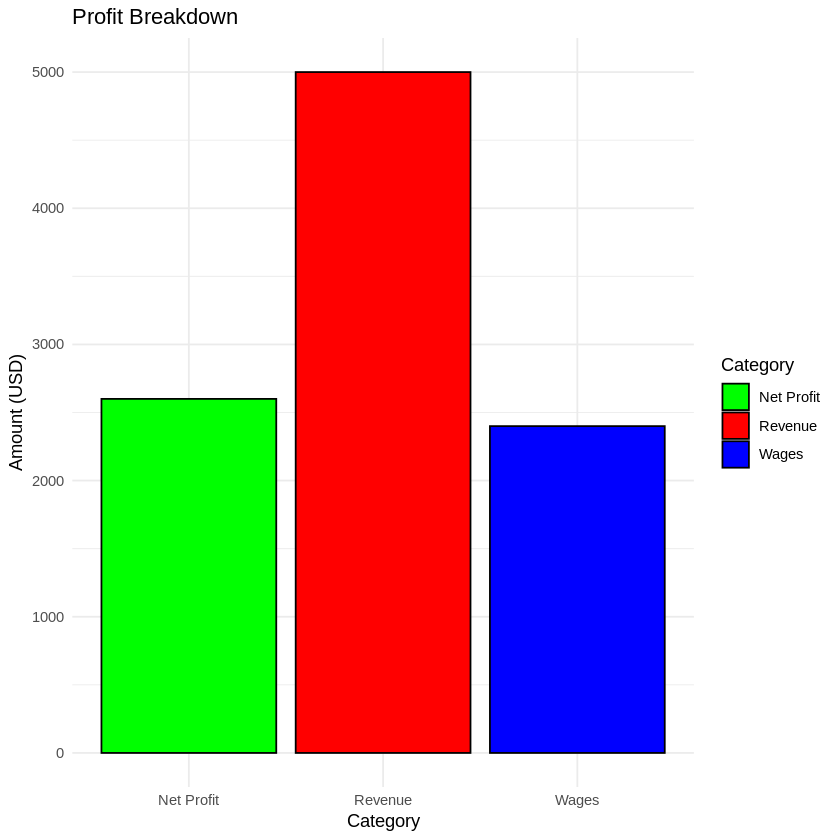

In [ ]:
# Profit Calculation Function
calculate_profit <- function(customers_served, L, operating_hours, revenue_per_customer = 50, wage_per_hour = 40) {
  # Calculate revenue
  total_revenue <- customers_served * revenue_per_customer

  # Calculate chef wages
  total_wages <- L * wage_per_hour * operating_hours

  # Calculate net profit
  net_profit <- total_revenue - total_wages

  # Return results
  return(list(
    total_revenue = total_revenue,
    total_wages = total_wages,
    net_profit = net_profit
  ))
}

# Profit Visualization Function
plot_profit <- function(profit_results) {
  # Create a data frame for plotting
  df <- data.frame(
    Category = c("Revenue", "Wages", "Net Profit"),
    Amount = c(profit_results$total_revenue, profit_results$total_wages, profit_results$net_profit)
  )

  # Plot the profit components
  ggplot(df, aes(x = Category, y = Amount, fill = Category)) +
    geom_bar(stat = "identity", color = "black") +
    labs(title = "Profit Breakdown",
         x = "Category",
         y = "Amount (USD)") +
    scale_fill_manual(values = c("green", "red", "blue")) +
    theme_minimal()
}

# Example usage
customers_served <- 100  # Example number of customers served
L <- 5  # Number of chefs
operating_hours <- 12  # Operating hours

# Calculate profits
profit_results <- calculate_profit(customers_served, L, operating_hours)

# Print profit results
cat("Total Revenue: $", profit_results$total_revenue, "\n")
cat("Total Wages: $", profit_results$total_wages, "\n")
cat("Net Profit: $", profit_results$net_profit, "\n")

# Plot profits
profit_plot <- plot_profit(profit_results)
print(profit_plot)


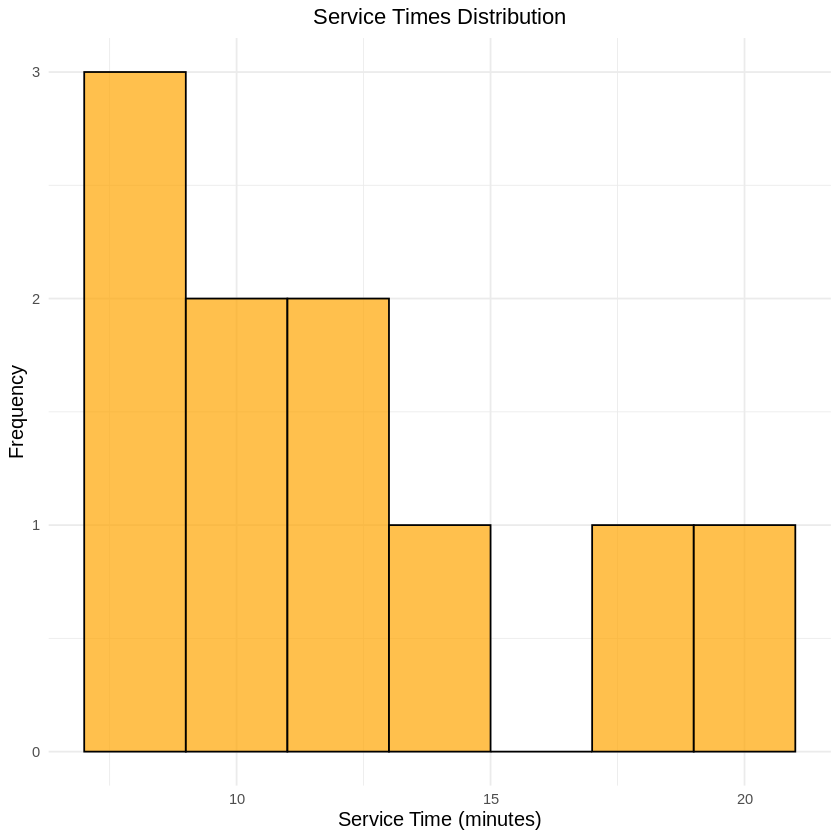

In [ ]:
# Function to Plot Service Times Distribution
plot_service_times <- function(service_times) {
  # Create a data frame for service times
  df <- data.frame(ServiceTime = service_times)

  # Plot the histogram
  ggplot(df, aes(x = ServiceTime)) +
    geom_histogram(binwidth = 2, fill = "orange", color = "black", alpha = 0.7) +
    labs(
      title = "Service Times Distribution",
      x = "Service Time (minutes)",
      y = "Frequency"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5),  # Center the title
      axis.title = element_text(size = 12)
    )
}

# Example service times
# Assuming results$service_times contains the service times from the simulation
service_times <- c(10, 12, 8, 15, 10, 7, 9, 20, 13, 18)  # Replace with your data

# Generate the plot
service_plot <- plot_service_times(service_times)

# Print the plot
print(service_plot)


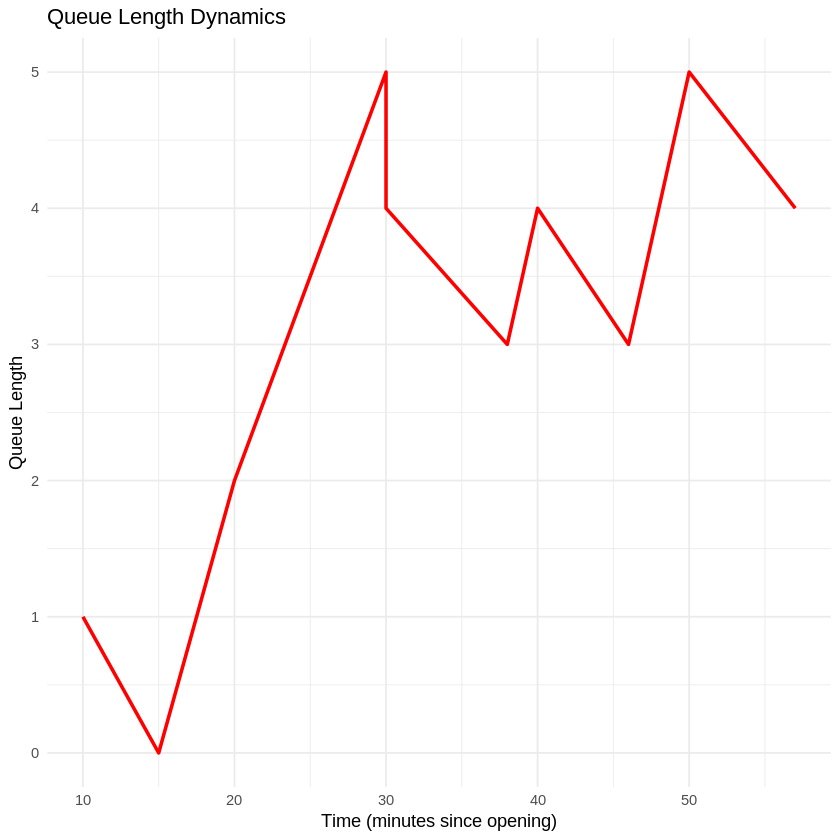

In [ ]:
plot_queue_dynamics <- function(arrival_times, group_sizes, L, service_times) {
  # Combine arrival and departure events
  event_times <- data.frame(
    Time = c(arrival_times, arrival_times + service_times),
    Type = c(rep("Arrival", length(arrival_times)), rep("Departure", length(service_times))),
    GroupSize = c(group_sizes, rep(0, length(service_times)))  # Group size only for arrivals
  )

  # Sort events by time
  event_times <- event_times[order(event_times$Time), ]

  # Initialize queue dynamics tracking
  queue_length <- 0
  time_points <- c()
  queue_sizes <- c()

  # Simulate queue dynamics
  for (i in 1:nrow(event_times)) {
    if (event_times$Type[i] == "Arrival") {
      # Add group size to the queue on arrival
      queue_length <- queue_length + event_times$GroupSize[i]
    } else {
      # Reduce the queue length by 1 for each departure
      queue_length <- max(0, queue_length - 1)
    }
    # Record the time point and queue size
    time_points <- c(time_points, event_times$Time[i])
    queue_sizes <- c(queue_sizes, queue_length)
  }

  # Create a data frame for plotting
  df <- data.frame(Time = time_points, QueueSize = queue_sizes)

  # Plot queue dynamics
  ggplot(df, aes(x = Time, y = QueueSize)) +
    geom_line(color = "red", size = 1) +
    labs(title = "Queue Length Dynamics",
         x = "Time (minutes since opening)",
         y = "Queue Length") +
    theme_minimal()
}

# Example Usage
arrival_times <- c(10, 20, 30, 40, 50)  # Example arrival times
group_sizes <- c(1, 2, 3, 1, 2)         # Example group sizes
service_times <- c(5, 10, 8, 6, 7)      # Example service times
L <- 5                                  # Number of chefs

# Plot queue dynamics
queue_plot <- plot_queue_dynamics(arrival_times, group_sizes, L, service_times)
print(queue_plot)


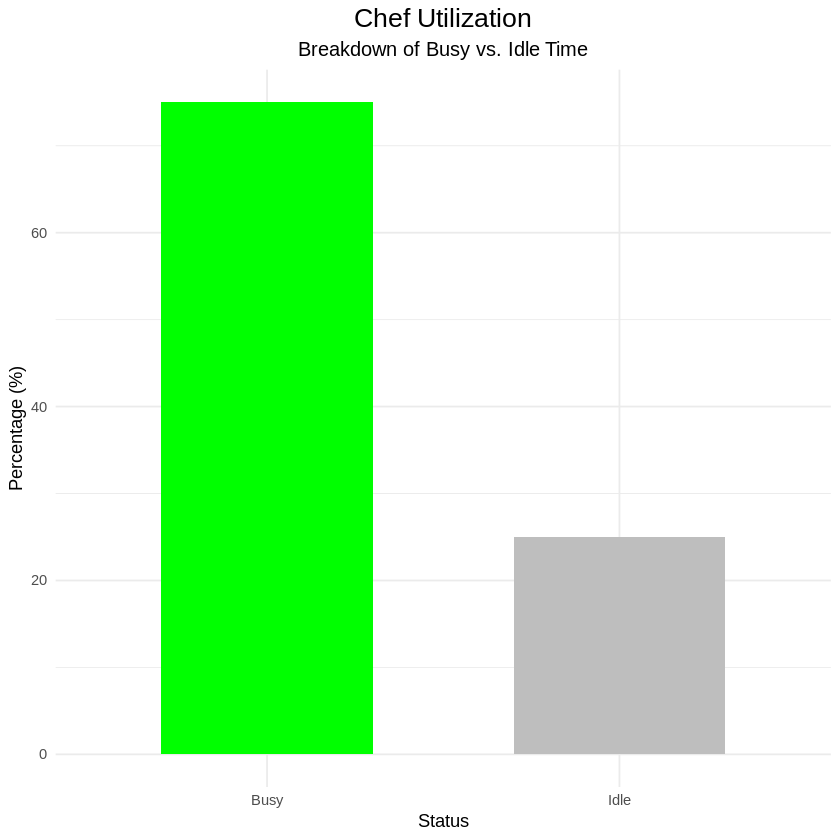

In [ ]:
# Plotting Chef Utilization
plot_chef_utilization <- function(utilization) {
  # Create a data frame for utilization
  df <- data.frame(
    Status = c("Busy", "Idle"),
    Percentage = c(utilization, 100 - utilization)
  )

  # Create the bar plot
  ggplot(df, aes(x = Status, y = Percentage, fill = Status)) +
    geom_bar(stat = "identity", width = 0.6) +
    labs(
      title = "Chef Utilization",
      x = "Status",
      y = "Percentage (%)",
      subtitle = "Breakdown of Busy vs. Idle Time"
    ) +
    scale_fill_manual(values = c("Busy" = "green", "Idle" = "gray")) +
    theme_minimal() +
    theme(
      legend.position = "none",
      plot.title = element_text(hjust = 0.5, size = 16),
      plot.subtitle = element_text(hjust = 0.5, size = 12)
    )
}

# Example Chef Utilization Value
chef_utilization <- 75  # Example value: 75% busy

# Plot the utilization
utilization_plot <- plot_chef_utilization(chef_utilization)
print(utilization_plot)


Comment on the customer’s queueing experience in this setting, par-
ticularly we vary the number of chefs L. From a business perspective, how many chefs L should be hired to maximize profits with high probability? Justify your recommendation. Comment on the down-time of the restaurant throughout the day, and what this might meansfor business operation.



Final Simulation

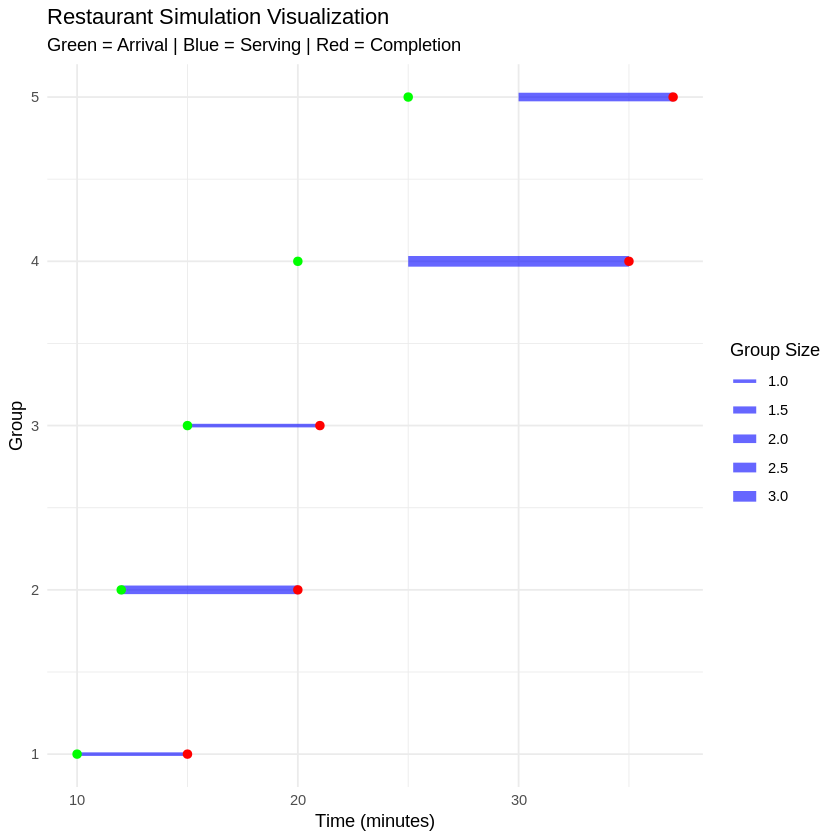

In [ ]:
library(ggplot2)

plot_simulation <- function(arrival_times, start_times, end_times, group_sizes) {
  # Create a data frame for plotting
  df <- data.frame(
    Group = 1:length(arrival_times),
    Arrival = arrival_times,
    Start = start_times,
    End = end_times,
    GroupSize = group_sizes
  )

  # Plot the simulation
  ggplot(df) +
    # Visualize the serving duration as a segment
    geom_segment(aes(x = Start, xend = End, y = Group, yend = Group, size = GroupSize), color = "blue", alpha = 0.6) +
    # Mark the arrival points
    geom_point(aes(x = Arrival, y = Group), color = "green", size = 2) +
    # Mark the end points (completion)
    geom_point(aes(x = End, y = Group), color = "red", size = 2) +
    # Adjust plot labels and titles
    labs(
      x = "Time (minutes)",
      y = "Group",
      title = "Restaurant Simulation Visualization",
      subtitle = "Green = Arrival | Blue = Serving | Red = Completion",
      size = "Group Size"
    ) +
    # Adjust plot theme
    theme_minimal() +
    theme(legend.position = "right") +
    scale_size_continuous(range = c(1, 3))  # Adjust group size scale for visibility
}

# Example data (for testing)
arrival_times <- c(10, 12, 15, 20, 25)  # Example arrival times
start_times <- c(10, 12, 15, 25, 30)    # Example start times (service begins)
end_times <- c(15, 20, 21, 35, 37)      # Example end times (service completes)
group_sizes <- c(1, 2, 1, 3, 2)         # Example group sizes

# Plot the simulation
plot_simulation(arrival_times, start_times, end_times, group_sizes)


**Varying chef conditions**

Warning message in arrival_times + service_times:
“longer object length is not a multiple of shorter object length”
Warning message in arrival_times + service_times:
“longer object length is not a multiple of shorter object length”
Warning message in arrival_times + service_times:
“longer object length is not a multiple of shorter object length”
Warning message in arrival_times + service_times:
“longer object length is not a multiple of shorter object length”
Warning message in arrival_times + service_times:
“longer object length is not a multiple of shorter object length”
Warning message in arrival_times + service_times:
“longer object length is not a multiple of shorter object length”
Warning message in arrival_times + service_times:
“longer object length is not a multiple of shorter object length”
Warning message in arrival_times + service_times:
“longer object length is not a multiple of shorter object length”
Warning message in arrival_times + service_times:
“longer object length 

L,total_arrivals,total_customers,peak_waiting,peak_serving,total_idle_time,chef_utilization,avg_wait_time,max_wait_time,net_profit
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,108,203,5,0,719.2672,0.107392793,0.000000000,0,9670
2,120,237,8,1,166.2979,33.943925538,2.041666667,8,10890
3,114,209,5,2,701.5460,0.401154384,0.000000000,0,9010
4,120,236,5,3,504.7587,7.367987684,0.008333333,1,9880
5,112,200,5,0,713.4594,0.004499989,0.000000000,0,7600
6,110,205,5,0,719.1632,0.007407117,0.000000000,0,7370
7,106,188,4,0,715.1322,0.000464138,0.000000000,0,6040
8,120,235,5,4,616.9397,0.711396286,0.000000000,0,7910
9,114,228,5,8,508.5997,2.889059523,0.000000000,0,7080


    L total_arrivals total_customers peak_waiting peak_serving total_idle_time
1   1            108             203            5            0        719.2672
2   2            120             237            8            1        166.2979
3   3            114             209            5            2        701.5460
4   4            120             236            5            3        504.7587
5   5            112             200            5            0        713.4594
6   6            110             205            5            0        719.1632
7   7            106             188            4            0        715.1322
8   8            120             235            5            4        616.9397
9   9            114             228            5            8        508.5997
10 10            114             216            5            3        667.9837
   chef_utilization avg_wait_time max_wait_time net_profit
1       0.107392793   0.000000000             0       9670
2      33.943

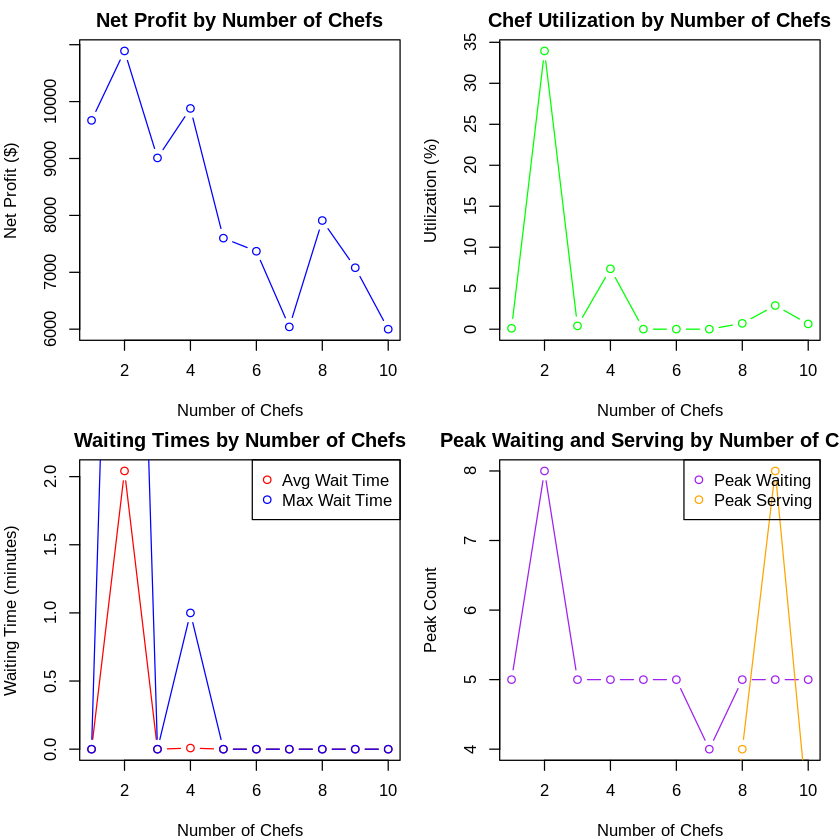

In [ ]:
# Install required packages if not already installed
required_packages <- c("ggplot2")
new_packages <- required_packages[!(required_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages, repos = "http://cran.rstudio.com/")

# Load required library
library(ggplot2)

# Function to generate arrival times with group sizes
generate_arrival_times_with_groups <- function(lambda_A, operating_hours, prob) {
  # Convert operating hours to total minutes
  total_time <- operating_hours * 60

  # Simulate arrival times based on the Poisson process
  arrival_times <- cumsum(rexp(ceiling(lambda_A * total_time / 60), rate = lambda_A / 60))

  # Filter out arrivals outside the operating hours
  arrival_times <- arrival_times[arrival_times <= total_time]

  # Generate corresponding group sizes (using a geometric distribution)
  n <- length(arrival_times)  # Number of arrivals
  group_sizes <- rgeom(n, prob = prob) + 1  # Geometric distribution +1 for group size starting at 1

  # Cap the grouping the sizes at 5
  group_sizes <- pmin(group_sizes, 5)

  # Convert arrival times to actual times starting at 10:00 AM
  start_time <- as.POSIXct("10:00", format = "%H:%M")
  actual_times <- start_time + arrival_times * 60  # Convert minutes to seconds

  # Format the times as "HH:MM AM/PM"
  formatted_times <- format(actual_times, "%I:%M %p")

  # Combine arrival times with group sizes
  arrival_info <- paste(formatted_times, ":", group_sizes)

  # Calculate total number of arrivals (just the length of arrival_times)
  total_arrivals <- length(arrival_times)

  # Calculate total number of customers (sum of all group sizes)
  total_customers <- sum(group_sizes)

  # Return both the arrival information and totals
  return(list(
    arrival_times = arrival_times,
    arrival_info = arrival_info,
    total_arrivals = total_arrivals,
    total_customers = total_customers,
    group_sizes = group_sizes
  ))
}

# Function to generate service times
generate_service_times <- function(group_sizes, L) {
  # Calculate the service rate
  lambda_S <- 3 * L  # λS = 3L

  # Initialize a vector to hold the service times
  service_times <- c()

  # Generate service times for each customer in each group
  for (group_size in group_sizes) {
    # Generate service times for the group based on exponential distribution
    group_service_times <- rexp(group_size, rate = lambda_S)
    service_times <- c(service_times, group_service_times)  # Append to the list
  }

  return(service_times)
}

# Function to measure customer experience
measure_customer_experience <- function(arrival_times, group_sizes, service_times, L, operating_hours) {
  # Initialize simulation variables
  total_time <- operating_hours * 60  # Convert hours to minutes
  current_time <- 0
  waiting_queue <- 0
  customers_being_served <- 0
  completed_customers <- 0
  down_time_periods <- list()
  peak_waiting <- 0
  peak_serving <- 0
  total_idle_time <- 0
  total_wait_time <- 0
  last_event_time <- 0
  busy_time <- 0  # Tracks time when chefs are actively serving

  # Track events: arrival and service completion (departure)
  event_times <- data.frame(time = c(arrival_times, arrival_times + service_times),
                            type = c(rep("arrival", length(arrival_times)), rep("departure", length(service_times))))
  event_times <- event_times[order(event_times$time),]  # Sort events by time

  # Track waiting times for each customer
  waiting_times <- numeric(length(arrival_times))

  # Simulation loop to process events
  for (i in 1:nrow(event_times)) {
    event_time <- event_times$time[i]
    event_type <- event_times$type[i]

    # Calculate idle or busy time
    if (event_time > last_event_time) {
      if (customers_being_served > 0) {
        busy_time <- busy_time + (event_time - last_event_time)
      } else {
        total_idle_time <- total_idle_time + (event_time - last_event_time)
      }
    }

    # Update current time
    current_time <- event_time
    last_event_time <- current_time

    # Handle arrival events
    if (event_type == "arrival") {
      index <- which(arrival_times == event_time)[1]
      group_size <- group_sizes[index]  # Get the group size
      waiting_queue <- waiting_queue + group_size

      # Track peak waiting queue
      peak_waiting <- max(peak_waiting, waiting_queue)

      # If there is capacity, serve immediately
      if (customers_being_served < L) {
        to_serve <- min(group_size, L - customers_being_served)  # Number that can start service
        waiting_queue <- waiting_queue - to_serve
        customers_being_served <- customers_being_served + to_serve
        waiting_times[index] <- 0  # No waiting time for this group
      } else {
        waiting_times[index] <- waiting_queue  # Track wait
      }
    }

    # Handle departure events
    if (event_type == "departure") {
      customers_being_served <- customers_being_served - 1  # One customer finished service
      completed_customers <- completed_customers + 1

      # Track peak serving customers
      peak_serving <- max(peak_serving, customers_being_served)

      # Serve next customer if queue is not empty
      if (waiting_queue > 0) {
        waiting_queue <- waiting_queue - 1
        customers_being_served <- customers_being_served + 1
      }
    }
  }

  # Calculate additional metrics
  total_chefs_time <- total_time * L  # Total possible time all chefs could be busy
  chef_utilization <- (busy_time / total_chefs_time) * 100  # Percentage of time chefs are busy
  avg_wait_time <- mean(waiting_times)
  max_wait_time <- max(waiting_times)

  # Return the results
  return(list(
    peak_waiting = peak_waiting,
    peak_serving = peak_serving,
    total_idle_time = total_idle_time,
    chef_utilization = chef_utilization,
    avg_wait_time = avg_wait_time,
    max_wait_time = max_wait_time,
    busy_time = busy_time,
    waiting_times = waiting_times
  ))
}

# Function to calculate waiting times
calculate_waiting_time <- function(arrival_times, service_times, L) {
  # Initialize variables
  n <- length(arrival_times)  # Number of customers
  chef_end_times <- rep(0, L)  # Track when each chef will be free
  waiting_times <- numeric(n)  # Store waiting times for each customer

  # Loop through each customer
  for (i in 1:n) {
    # Find the earliest available chef
    earliest_chef <- which.min(chef_end_times)
    next_available_time <- chef_end_times[earliest_chef]

    # Calculate waiting time
    if (arrival_times[i] < next_available_time) {
      waiting_times[i] <- next_available_time - arrival_times[i]  # Wait until the chef is free
    } else {
      waiting_times[i] <- 0  # No waiting time if a chef is available
    }

    # Update the end time for the chef serving this customer
    chef_end_times[earliest_chef] <- max(arrival_times[i], next_available_time) + service_times[i]
  }

  return(waiting_times)
}

# Function to calculate profit
calculate_profit <- function(customers_served, L, operating_hours, revenue_per_customer = 50, wage_per_hour = 40) {
  # Calculate revenue
  total_revenue <- customers_served * revenue_per_customer

  # Calculate chef wages
  total_wages <- L * wage_per_hour * operating_hours

  # Calculate net profit
  net_profit <- total_revenue - total_wages

  # Return results
  return(list(
    total_revenue = total_revenue,
    total_wages = total_wages,
    net_profit = net_profit
  ))
}

# Simulation Parameters function
simulate_restaurant <- function(lambda_A = 10, operating_hours = 12, prob = 0.5, L_range = 1:10) {
  # Initialize results storage
  results_df <- data.frame(
    L = numeric(),
    total_arrivals = numeric(),
    total_customers = numeric(),
    peak_waiting = numeric(),
    peak_serving = numeric(),
    total_idle_time = numeric(),
    chef_utilization = numeric(),
    avg_wait_time = numeric(),
    max_wait_time = numeric(),
    net_profit = numeric()
  )

  # Run simulation for different numbers of chefs
  for (L in L_range) {
    # Generate arrival times with group sizes
    arrival_results <- generate_arrival_times_with_groups(lambda_A, operating_hours, prob)

    # Generate service times
    service_times <- generate_service_times(arrival_results$group_sizes, L)

    # Measure customer experience
    experience_results <- measure_customer_experience(
      arrival_times = arrival_results$arrival_times,
      group_sizes = arrival_results$group_sizes,
      service_times = service_times,
      L = L,
      operating_hours = operating_hours
    )

    # Calculate profit
    profit_results <- calculate_profit(
      customers_served = arrival_results$total_customers,
      L = L,
      operating_hours = operating_hours
    )

    # Store results
    results_df <- rbind(results_df, data.frame(
      L = L,
      total_arrivals = arrival_results$total_arrivals,
      total_customers = arrival_results$total_customers,
      peak_waiting = experience_results$peak_waiting,
      peak_serving = experience_results$peak_serving,
      total_idle_time = experience_results$total_idle_time,
      chef_utilization = experience_results$chef_utilization,
      avg_wait_time = experience_results$avg_wait_time,
      max_wait_time = experience_results$max_wait_time,
      net_profit = profit_results$net_profit
    ))
  }

  return(results_df)
}

# Plotting function with single plot output
plot_simulation_metrics <- function(results_df) {
  # Create a multi-panel plot using par()
  par(mfrow = c(2, 2), mar = c(4, 4, 2, 1))

  # 1. Net Profit vs Number of Chefs
  plot(net_profit ~ L, data = results_df,
       main = "Net Profit by Number of Chefs",
       xlab = "Number of Chefs",
       ylab = "Net Profit ($)",
       type = "b",
       col = "blue")

  # 2. Chef Utilization vs Number of Chefs
  plot(chef_utilization ~ L, data = results_df,
       main = "Chef Utilization by Number of Chefs",
       xlab = "Number of Chefs",
       ylab = "Utilization (%)",
       type = "b",
       col = "green")

  # 3. Waiting Times vs Number of Chefs
  plot(avg_wait_time ~ L, data = results_df,
       main = "Waiting Times by Number of Chefs",
       xlab = "Number of Chefs",
       ylab = "Waiting Time (minutes)",
       type = "b",
       col = "red")
  points(max_wait_time ~ L, data = results_df, type = "b", col = "blue")
  legend("topright", legend = c("Avg Wait Time", "Max Wait Time"),
         col = c("red", "blue"), pch = 1)

  # 4. Peak Metrics vs Number of Chefs
  plot(peak_waiting ~ L, data = results_df,
       main = "Peak Waiting and Serving by Number of Chefs",
       xlab = "Number of Chefs",
       ylab = "Peak Count",
       type = "b",
       col = "purple")
  points(peak_serving ~ L, data = results_df, type = "b", col = "orange")
  legend("topright", legend = c("Peak Waiting", "Peak Serving"),
         col = c("purple", "orange"), pch = 1)

  # Return the results for further analysis
  return(results_df)
}

# Run simulation
set.seed(240)
simulation_results <- simulate_restaurant()

# Generate and display plots
plot_simulation_metrics(simulation_results)

# Print summary table
print(simulation_results)


# **More Possible Senarios to Consider**
Here are the 10 extensions with specific details added to guide the scenarios:

1. **Variable Customer Arrival Rates**:
   - Assume peak hours are 12:00 PM - 2:00 PM and 6:00 PM - 8:00 PM with a customer arrival rate of 15 customers/hour (Poisson process). Off-peak hours have a rate of 5 customers/hour. Analyze how these fluctuations impact waiting times and required staff levels.

2. **Customer Groups and Table Sizes**:
   - Assume 40% of arrivals are groups of 2, 30% groups of 4, and 30% single customers. Each group requires appropriately sized tables (2-seater, 4-seater). Simulate how accommodating these groups affects wait times and table utilization.

3. **Menu Complexity and Service Time**:
   - Introduce two menu types: a "Basic Menu" with an average service time of 15 minutes (Exponential, rate = 4) and a "Gourmet Menu" with an average service time of 30 minutes (Exponential, rate = 2). Determine how changing 50% of the orders to the Gourmet Menu affects overall service efficiency.

4. **Special Events or Promotions**:
   - Simulate a Friday night "Happy Hour" from 5:00 PM - 7:00 PM with an increased arrival rate of 20 customers/hour. Customers during this period spend an average of 30 dollars per meal instead of 50 dollars. Evaluate its profitability compared to regular evenings.

5. **Customer Patience and Abandonment**:
   - Assume customers are willing to wait up to 10 minutes on average (Exponential patience distribution with rate = 0.1). After this, 25% of them leave without being served. Analyze the impact of adding an extra chef to reduce abandonment rates.

6. **Multi-Level Staff Management**:
   - Introduce a model with 2 waitstaff for every chef, where waitstaff handle seating and order-taking, reducing the chef's service time from 15 minutes to 10 minutes on average (Exponential, rate = 6). Analyze how this division of labor impacts profits and downtime.

7. **Dynamic Pricing**:
   - Assume dynamic pricing increases meal costs by 20% during peak hours (lunch and dinner) and reduces them by 10% during off-peak hours. Evaluate its impact on daily revenue and peak-hour customer retention.

8. **Delivery and Takeout Orders**:
   - Assume 30% of customers during off-peak hours order takeout, requiring 75% of the service time of dine-in customers (Exponential service rate = 8). Analyze the kitchen workload and the effect on dine-in service times.

9. **Seasonal Variations**:
   - Assume summer months (June-August) increase arrival rates to 12 customers/hour on average, while winter months (December-February) reduce them to 8 customers/hour. Evaluate staffing and profitability adjustments required for these changes.

10. **Health and Safety Constraints**:
    - Simulate a social distancing policy limiting occupancy to 3 active dining tables at any time, with one chef per table. Customers have a 20% higher patience threshold (average of 12 minutes). Assess how this restriction affects customer satisfaction and revenue.

## Distribution Information
Here are the extensions with explicit processes and distributions for modeling:

1. **Variable Customer Arrival Rates**:
   - **Arrival Process**: Poisson process with rate λ = 15 customers/hour for peak hours (12 PM - 2 PM and 6 PM - 8 PM), λ = 5 customers/hour for off-peak hours.
   - **Service Times**: Exponential distribution with rate μ = 6 customers/hour.

2. **Customer Groups and Table Sizes**:
   - **Arrival Process**: Poisson process with λ = 10 customers/hour.
   - **Group Sizes**: Discrete distribution: P(single) = 0.3, P(group of 2) = 0.4, P(group of 4) = 0.3.
   - **Service Times**: Exponential distribution with rate μ= 4 (single), 2.5 (group of 2), 1.5 (group of 4).

3. **Menu Complexity and Service Time**:
   - **Arrival Process**: Poisson process with λ = 8 customers/hour.
   - **Service Times**: Mixture of two Exponential distributions: μ1= 4/hour (Basic Menu, probability 0.5), μ2 = 2/hour (Gourmet Menu, probability 0.5).

4. **Special Events or Promotions**:
   - **Arrival Process**: Poisson process with λ = 20 customers/hour during happy hour.
   - **Service Times**: Exponential distribution with rate μ = 5 customers/hour.
   - **Spending per Customer**: Uniform distribution U(25, 35) to model variations in spending during promotions.

5. **Customer Patience and Abandonment**:
   - **Arrival Process**: Poisson process with λ = 10 customers/hour.
   - **Service Times**: Exponential distribution with rate μ = 4 customers/hour.
   - **Patience Times**: Exponential distribution with rate v = 0.1 (mean patience = 10 minutes).

6. **Multi-Level Staff Management**:
   - **Arrival Process**: Poisson process with λ = 12 customers/hour.
   - **Service Times**: Exponential distribution with rate μ = 6 customers/hour when chefs are supported by waitstaff, μ = 4/hour without waitstaff.

7. **Dynamic Pricing**:
   - **Arrival Process**: Poisson process with λ = 15 customers/hour during peak hours,λ= 8 during off-peak.
   - **Service Times**: Exponential distribution with rate μ = 6/hour.
   - **Revenue per Customer**: Piecewise function: $60/customer (peak hours), $45/customer (off-peak).

8. **Delivery and Takeout Orders**:
   - **Arrival Process**: Poisson process with λ= 10 customers/hour.
   - **Takeout Proportion**: Bernoulli distribution with p = 0.3.
   - **Service Times**: Exponential distribution with rate μ = 6/hour (dine-in), μ = 8/hour (takeout).

9. **Seasonal Variations**:
   - **Arrival Process**: Poisson process with λ= 12 customers/hour (summer), λ = 8/hour (winter).
   - **Service Times**: Exponential distribution with rateμ = 6/hour.

10. **Health and Safety Constraints**:
    - **Arrival Process**: Poisson process with λ = 10 customers/hour.
    - **Service Times**: Exponential distribution with rate λ = 6/hour.
    - **Occupancy Constraint**: Uniform distribution U(2, 3)to randomly limit table availability at any given time.

These choices ensure alignment with probabilistic modeling, where Poisson processes are widely used for arrival times and exponential distributions for service times due to their memoryless properties, which are realistic for queueing systems.

### **Scenario 3: Menu Complexity and Service Time**

In [ ]:
simulate_menu_service <- function(lambda, hours, p_gourmet, rate_basic, rate_gourmet) {
  # Step 1: Generate customer arrivals (Poisson process)
  total_time <- hours * 60 # Convert hours to minutes
  arrival_times <- cumsum(rexp(ceiling(lambda * total_time / 60), rate = lambda / 60))
  arrival_times <- arrival_times[arrival_times <= total_time] # Filter within operating hours

  # Step 2: Assign menu types and generate service times
  n <- length(arrival_times)
  menu_types <- rbinom(n, 1, prob = p_gourmet) # 1 = Gourmet, 0 = Basic
  service_times <- ifelse(
    menu_types == 1,
    rexp(n, rate = rate_gourmet), # Gourmet Menu
    rexp(n, rate = rate_basic)   # Basic Menu
  )

  # Step 3: Simulate the service process
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0

  for (i in 1:n) {
    if (arrival_times[i] >= table_free_time) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Step 4: Create raw data and calculate summary statistics
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times,
    Start = start_times,
    End = end_times,
    Waiting_Time = waiting_times,
    Service_Time = service_times,
    Menu_Type = ifelse(menu_types == 1, "Gourmet", "Basic")
  )

  avg_waiting_time <- mean(waiting_times)
  avg_service_time <- mean(service_times)
  total_downtime <- sum(diff(c(0, sort(end_times))) - diff(c(0, sort(arrival_times))))

  cat("Summary Statistics:\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Average Service Time:", avg_service_time, "minutes\n")
  cat("Total Downtime:", total_downtime, "minutes\n")
  cat("Number of Basic Menu Orders:", sum(menu_types == 0), "\n")
  cat("Number of Gourmet Menu Orders:", sum(menu_types == 1), "\n")

  return(list(raw_data = raw_data))
}

# Parameters
lambda <- 8             # Arrival rate (customers/hour)
hours <- 10             # Operating hours
p_gourmet <- 0.5        # Probability of Gourmet Menu
rate_basic <- 4         # Rate for Basic Menu (1 service per 15 minutes on average)
rate_gourmet <- 2       # Rate for Gourmet Menu (1 service per 30 minutes on average)

# Run simulation
result_menu <- simulate_menu_service(lambda, hours, p_gourmet, rate_basic, rate_gourmet)

# Output raw data
print(result_menu$raw_data)


Summary Statistics:
Average Waiting Time: 0.04702757 minutes
Average Service Time: 0.4635544 minutes
Total Downtime: 0.02402166 minutes
Number of Basic Menu Orders: 43 
Number of Gourmet Menu Orders: 37 
   Customer    Arrival      Start        End Waiting_Time Service_Time
1         1   7.485598   7.485598   7.794084    0.0000000  0.308485388
2         2  10.881582  10.881582  10.966335    0.0000000  0.084753098
3         3  13.148421  13.148421  13.257467    0.0000000  0.109045904
4         4  13.539071  13.539071  13.723578    0.0000000  0.184507311
5         5  13.759287  13.759287  15.615339    0.0000000  1.856052221
6         6  15.970919  15.970919  15.992013    0.0000000  0.021094145
7         7  22.577385  22.577385  23.458280    0.0000000  0.880894510
8         8  34.912310  34.912310  35.398168    0.0000000  0.485857829
9         9  53.147364  53.147364  53.821048    0.0000000  0.673683719
10       10  64.483343  64.483343  64.634434    0.0000000  0.151091354
11       11  77

In [ ]:
# Pie Chart of Menu Types
plot_menu_type_pie <- function(simulation_data) {
  menu_counts <- table(simulation_data$Menu_Type)
  pie(menu_counts,
      labels = paste(names(menu_counts), ": ", menu_counts, sep = ""),
      col = c("orange", "purple"),
      main = "Menu Type Distribution")
}


# Service Time Utilization Over Time (Line Chart)
plot_service_utilization <- function(simulation_data) {
  # Create a time series of service events
  timeline <- data.frame(
    Time = c(simulation_data$Arrival, simulation_data$End),
    Event = c(rep("Start", nrow(simulation_data)), rep("End", nrow(simulation_data))),
    Menu_Type = rep(simulation_data$Menu_Type, 2)
  )

  timeline <- timeline[order(timeline$Time), ]
  timeline$Utilization <- ifelse(timeline$Event == "Start", 1, -1)
  timeline$Cumulative_Utilization <- cumsum(timeline$Utilization)

  ggplot(timeline, aes(x = Time, y = Cumulative_Utilization, color = Menu_Type)) +
    geom_line(size = 1.2) +
    labs(
      title = "Service Time Utilization Over Time",
      x = "Time (minutes)",
      y = "Cumulative Utilization"
    ) +
    theme_minimal() +
    scale_color_manual(values = c("Basic" = "blue", "Gourmet" = "green"))
}

# Service Time Utilization Over Time (Line Chart)
plot_service_utilization <- function(simulation_data) {
  # Create a time series of service events
  timeline <- data.frame(
    Time = c(simulation_data$Arrival, simulation_data$End),
    Event = c(rep("Start", nrow(simulation_data)), rep("End", nrow(simulation_data))),
    Menu_Type = rep(simulation_data$Menu_Type, 2)
  )

  timeline <- timeline[order(timeline$Time), ]
  timeline$Utilization <- ifelse(timeline$Event == "Start", 1, -1)
  timeline$Cumulative_Utilization <- cumsum(timeline$Utilization)

  ggplot(timeline, aes(x = Time, y = Cumulative_Utilization, color = Menu_Type)) +
    geom_line(size = 1.2) +
    labs(
      title = "Service Time Utilization Over Time",
      x = "Time (minutes)",
      y = "Cumulative Utilization"
    ) +
    theme_minimal() +
    scale_color_manual(values = c("Basic" = "blue", "Gourmet" = "green"))
}



# Run the simulation
lambda <- 8             # Arrival rate (customers/hour)
hours <- 10             # Operating hours
p_gourmet <- 0.5        # Probability of Gourmet Menu
rate_basic <- 4         # Rate for Basic Menu (1 service per 15 minutes on average)
rate_gourmet <- 2       # Rate for Gourmet Menu (1 service per 30 minutes on average)

result_menu <- simulate_menu_service(lambda, hours, p_gourmet, rate_basic, rate_gourmet)

# Visualization 1: Timeline of Customers (Existing ggplot Visualization)
plot_menu_simulation(result_menu$raw_data)

# Visualization 2: Service Time Utilization Over Time
plot_service_utilization(result_menu$raw_data)

# Visualization 3: Pie Chart of Menu Types
plot_menu_type_pie(result_menu$raw_data)


Summary Statistics:
Average Waiting Time: 0.01688014 minutes
Average Service Time: 0.3380287 minutes
Total Downtime: 0.08648543 minutes
Number of Basic Menu Orders: 43 
Number of Gourmet Menu Orders: 34 


ERROR: Error in plot_menu_simulation(result_menu$raw_data): could not find function "plot_menu_simulation"


### **Scenario 7: Dynamic Pricing**



In [ ]:
library(ggplot2)

# Simulate dynamic pricing with customer retention and revenue analysis
simulate_dynamic_pricing <- function(peak_lambda, off_peak_lambda, peak_hours, off_peak_hours, service_rate, peak_revenue, off_peak_revenue) {
  # Step 1: Generate customer arrivals for peak and off-peak hours
  peak_arrival_times <- cumsum(rexp(ceiling(peak_lambda * peak_hours), rate = peak_lambda / 60))
  off_peak_arrival_times <- cumsum(rexp(ceiling(off_peak_lambda * off_peak_hours), rate = off_peak_lambda / 60))

  # Adjust arrival times for peak and off-peak periods
  off_peak_arrival_times <- off_peak_arrival_times + max(peak_arrival_times, na.rm = TRUE)

  # Combine peak and off-peak arrivals
  arrival_times <- c(peak_arrival_times, off_peak_arrival_times)
  n <- length(arrival_times)

  # Step 2: Assign service times (Exponential distribution)
  service_times <- rexp(n, rate = service_rate)

  # Step 3: Determine revenue based on arrival time
  is_peak <- arrival_times <= max(peak_arrival_times)
  revenues <- ifelse(is_peak, peak_revenue, off_peak_revenue)

  # Step 4: Simulate service process
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0

  for (i in 1:n) {
    if (arrival_times[i] >= table_free_time) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Calculate total revenue and peak-hour customer retention
  total_revenue <- sum(revenues)
  peak_customer_retention <- sum(is_peak) / ceiling(peak_lambda * peak_hours)

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times,
    Start = start_times,
    End = end_times,
    Waiting_Time = waiting_times,
    Service_Time = service_times,
    Revenue = revenues,
    Is_Peak = is_peak
  )

  # Print summary statistics
  cat("Summary Statistics:\n")
  cat("Total Revenue:", total_revenue, "USD\n")
  cat("Peak-Hour Customer Retention:", round(peak_customer_retention * 100, 2), "%\n")
  cat("Average Waiting Time (All):", mean(waiting_times), "minutes\n")
  cat("Average Waiting Time (Peak):", mean(waiting_times[is_peak]), "minutes\n")
  cat("Average Waiting Time (Off-Peak):", mean(waiting_times[!is_peak]), "minutes\n")

  return(list(raw_data = raw_data, total_revenue = total_revenue, peak_retention = peak_customer_retention))
}

# Visualization 1: Revenue Distribution by Peak/Off-Peak
plot_revenue_distribution <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Revenue, fill = Is_Peak)) +
    geom_histogram(binwidth = 5, position = "dodge", alpha = 0.7) +
    scale_fill_manual(values = c("TRUE" = "blue", "FALSE" = "orange"), labels = c("Peak", "Off-Peak")) +
    labs(
      title = "Revenue Distribution by Peak/Off-Peak Hours",
      x = "Revenue per Customer (USD)",
      y = "Number of Customers",
      fill = "Time Period"
    ) +
    theme_minimal()
}

# Visualization 2: Customer Flow Timeline
plot_customer_flow <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Arrival, y = Customer, color = Is_Peak)) +
    geom_point(size = 2, alpha = 0.7) +
    scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "orange"), labels = c("Peak", "Off-Peak")) +
    labs(
      title = "Customer Flow Timeline by Peak/Off-Peak Hours",
      x = "Arrival Time (minutes)",
      y = "Customer ID",
      color = "Time Period"
    ) +
    theme_minimal()
}

# Visualization 3: Hourly Revenue Line Chart
plot_hourly_revenue <- function(simulation_data, peak_hours, off_peak_hours) {
  # Add an Hour column to categorize revenue by hour
  simulation_data$Hour <- floor(simulation_data$Arrival / 60) + 1 # Convert minutes to hours

  # Summarize revenue by hour
  hourly_revenue <- aggregate(Revenue ~ Hour + Is_Peak, data = simulation_data, sum)

  # Create line plot
  ggplot(hourly_revenue, aes(x = Hour, y = Revenue, color = Is_Peak, group = Is_Peak)) +
    geom_line(size = 1.2) +
    geom_point(size = 3) +
    scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "orange"), labels = c("Peak", "Off-Peak")) +
    labs(
      title = "Hourly Revenue Breakdown by Peak and Off-Peak Hours",
      x = "Hour of the Day",
      y = "Total Revenue (USD)",
      color = "Time Period"
    ) +
    theme_minimal() +
    scale_x_continuous(breaks = seq(1, peak_hours + off_peak_hours, by = 1))
}

# Visualization 4: Cumulative Revenue Over Time
plot_cumulative_revenue <- function(simulation_data) {
  # Add cumulative revenue calculation
  simulation_data <- simulation_data[order(simulation_data$Arrival), ] # Sort by arrival time
  simulation_data$Cumulative_Revenue <- cumsum(simulation_data$Revenue)

  # Create the plot
  ggplot(simulation_data, aes(x = Arrival, y = Cumulative_Revenue, color = Is_Peak)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "orange"), labels = c("Peak", "Off-Peak")) +
    labs(
      title = "Cumulative Revenue Over Time by Peak and Off-Peak Hours",
      x = "Time (minutes since opening)",
      y = "Cumulative Revenue (USD)",
      color = "Time Period"
    ) +
    theme_minimal()
}

# Parameters
peak_lambda <- 15       # Arrival rate during peak hours (customers/hour)
off_peak_lambda <- 8    # Arrival rate during off-peak hours (customers/hour)
peak_hours <- 4         # Duration of peak hours (in hours)
off_peak_hours <- 6     # Duration of off-peak hours (in hours)
service_rate <- 6       # Service rate (1 customer per 10 minutes)
peak_revenue <- 60      # Revenue per customer during peak hours
off_peak_revenue <- 45  # Revenue per customer during off-peak hours

# Run simulation
result_pricing <- simulate_dynamic_pricing(peak_lambda, off_peak_lambda, peak_hours, off_peak_hours, service_rate, peak_revenue, off_peak_revenue)

# Display raw data
display_raw_data <- function(simulation_data) {
  print("Raw Data for Dynamic Pricing Scenario:")
  print(head(simulation_data, 10)) # Display the first 10 rows for readability
}

# Run the cumulative revenue calculation for raw data
prepare_raw_data <- function(simulation_data) {
  # Sort by arrival time and calculate cumulative revenue
  simulation_data <- simulation_data[order(simulation_data$Arrival), ]
  simulation_data$Cumulative_Revenue <- cumsum(simulation_data$Revenue)
  return(simulation_data)
}

# Prepare and display raw data
prepared_raw_data <- prepare_raw_data(result_pricing$raw_data)
display_raw_data(prepared_raw_data)

# Visualization 1: Revenue Distribution
plot_revenue_distribution(result_pricing$raw_data)

# Visualization 2: Customer Flow Timeline
plot_customer_flow(result_pricing$raw_data)

# Run the hourly revenue plot
plot_hourly_revenue(result_pricing$raw_data, peak_hours, off_peak_hours)

# Run the cumulative revenue plot
plot_cumulative_revenue(result_pricing$raw_data)


### **Scenario 8: Delivery and Takeout Orders**

In [ ]:
library(ggplot2)

# Function to simulate delivery and takeout orders
simulate_delivery_takeout <- function(lambda, hours, takeout_prob, rate_dine_in, rate_takeout) {
  # Step 1: Generate customer arrivals (Poisson process)
  total_time <- hours * 60 # Convert hours to minutes
  arrival_times <- cumsum(rexp(ceiling(lambda * total_time / 60), rate = lambda / 60))
  arrival_times <- arrival_times[arrival_times <= total_time] # Keep arrivals within operating hours

  # Step 2: Assign customer types (Dine-in or Takeout)
  n <- length(arrival_times)
  is_takeout <- rbinom(n, 1, takeout_prob) # 1 = Takeout, 0 = Dine-in

  # Step 3: Assign service times based on customer type
  service_times <- ifelse(
    is_takeout == 1,
    rexp(n, rate = rate_takeout), # Takeout service time
    rexp(n, rate = rate_dine_in)  # Dine-in service time
  )

  # Step 4: Simulate service process
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0

  for (i in 1:n) {
    if (arrival_times[i] >= table_free_time) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times,
    Start = start_times,
    End = end_times,
    Waiting_Time = waiting_times,
    Service_Time = service_times,
    Customer_Type = ifelse(is_takeout == 1, "Takeout", "Dine-In")
  )

  # Summary statistics
  avg_waiting_time <- mean(waiting_times)
  avg_service_time_dine_in <- mean(service_times[is_takeout == 0])
  avg_service_time_takeout <- mean(service_times[is_takeout == 1])
  total_customers <- n

  cat("Summary Statistics:\n")
  cat("Total Customers:", total_customers, "\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Average Service Time (Dine-In):", avg_service_time_dine_in, "minutes\n")
  cat("Average Service Time (Takeout):", avg_service_time_takeout, "minutes\n")

  return(list(raw_data = raw_data))
}

# Visualization 1: Service Times by Customer Type (Boxplot)
plot_service_times_boxplot <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Customer_Type, y = Service_Time, fill = Customer_Type)) +
    geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.size = 2) +
    labs(
      title = "Service Times by Customer Type",
      x = "Customer Type",
      y = "Service Time (minutes)"
    ) +
    theme_minimal() +
    scale_fill_manual(values = c("Takeout" = "orange", "Dine-In" = "blue"))
}

# Visualization 2: Customer Flow Timeline
plot_customer_flow <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Arrival, y = Customer, color = Customer_Type)) +
    geom_point(size = 2, alpha = 0.7) +
    scale_color_manual(values = c("Takeout" = "orange", "Dine-In" = "blue")) +
    labs(
      title = "Customer Flow Timeline by Customer Type",
      x = "Arrival Time (minutes)",
      y = "Customer ID",
      color = "Customer Type"
    ) +
    theme_minimal()
}

# Visualization 3: Kitchen Utilization Over Time
plot_kitchen_utilization <- function(simulation_data) {
  # Create timeline data
  timeline <- data.frame(
    Time = c(simulation_data$Start, simulation_data$End),
    Event = c(rep("Start", nrow(simulation_data)), rep("End", nrow(simulation_data))),
    Customer_Type = rep(simulation_data$Customer_Type, 2)
  )
  timeline <- timeline[order(timeline$Time), ]
  timeline$Utilization <- ifelse(timeline$Event == "Start", 1, -1)
  timeline$Cumulative_Utilization <- cumsum(timeline$Utilization)

  ggplot(timeline, aes(x = Time, y = Cumulative_Utilization, color = Customer_Type)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c("Takeout" = "orange", "Dine-In" = "blue")) +
    labs(
      title = "Kitchen Utilization Over Time",
      x = "Time (minutes)",
      y = "Cumulative Utilization",
      color = "Customer Type"
    ) +
    theme_minimal()
}

# Visualization 4: Waiting Time Distribution by Customer Type
plot_waiting_time_histogram <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Waiting_Time, fill = Customer_Type)) +
    geom_histogram(binwidth = 1, position = "dodge", alpha = 0.7) +
    scale_fill_manual(values = c("Takeout" = "orange", "Dine-In" = "blue")) +
    labs(
      title = "Waiting Time Distribution by Customer Type",
      x = "Waiting Time (minutes)",
      y = "Number of Customers",
      fill = "Customer Type"
    ) +
    theme_minimal()
}

# Parameters
lambda <- 10            # Arrival rate (customers/hour)
hours <- 8              # Operating hours
takeout_prob <- 0.3     # Probability of takeout order
rate_dine_in <- 6       # Service rate for dine-in (1 customer per 10 minutes)
rate_takeout <- 8       # Service rate for takeout (1 customer per 7.5 minutes)

# Run simulation
result_delivery_takeout <- simulate_delivery_takeout(lambda, hours, takeout_prob, rate_dine_in, rate_takeout)

# Display raw data
print("Raw Data for Delivery and Takeout Orders:")
print(head(result_delivery_takeout$raw_data, 10)) # Display first 10 rows of raw data

# Visualization 1: Service Times by Customer Type
plot_service_times_boxplot(result_delivery_takeout$raw_data)

# Visualization 2: Customer Flow Timeline
plot_customer_flow(result_delivery_takeout$raw_data)

# Visualization 3: Kitchen Utilization Over Time
plot_kitchen_utilization(result_delivery_takeout$raw_data)

# Visualization 4: Waiting Time Distribution by Customer Type
plot_waiting_time_histogram(result_delivery_takeout$raw_data)


## **Scenario 9: Seasonal Variation**

In [ ]:
library(ggplot2)

# Function to simulate seasonal variations
simulate_seasonal_variations <- function(lambda_summer, lambda_winter, service_rate, hours_per_day, days_per_season) {
  # Generate arrival times for summer (higher arrival rate)
  summer_arrivals <- cumsum(rexp(ceiling(lambda_summer * hours_per_day * days_per_season), rate = lambda_summer / 60))

  # Generate arrival times for winter (lower arrival rate)
  winter_arrivals <- cumsum(rexp(ceiling(lambda_winter * hours_per_day * days_per_season), rate = lambda_winter / 60))
  winter_arrivals <- winter_arrivals + max(summer_arrivals) # Offset winter times to follow summer

  # Combine summer and winter arrivals
  arrival_times <- c(summer_arrivals, winter_arrivals)
  season_labels <- c(rep("Summer", length(summer_arrivals)), rep("Winter", length(winter_arrivals)))

  # Generate service times (Exponential)
  n <- length(arrival_times)
  service_times <- rexp(n, rate = service_rate)

  # Simulate service process
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0

  for (i in 1:n) {
    if (arrival_times[i] >= table_free_time) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival_Minutes = round(arrival_times, 2),
    Start_Minutes = round(start_times, 2),
    End_Minutes = round(end_times, 2),
    Waiting_Time_Minutes = round(waiting_times, 2),
    Service_Time_Minutes = round(service_times, 2),
    Season = season_labels
  )

  # Summary statistics
  avg_waiting_time <- mean(waiting_times)
  avg_service_time <- mean(service_times)
  total_customers_summer <- sum(season_labels == "Summer")
  total_customers_winter <- sum(season_labels == "Winter")

  cat("Summary Statistics:\n")
  cat("Total Customers (Summer):", total_customers_summer, "\n")
  cat("Total Customers (Winter):", total_customers_winter, "\n")
  cat("Average Waiting Time (Overall):", round(avg_waiting_time, 2), "minutes\n")
  cat("Average Service Time:", round(avg_service_time, 2), "minutes\n")

  return(list(raw_data = raw_data))
}

# Visualization 1: Customers Served per Season
plot_customers_per_season <- function(simulation_data) {
  season_counts <- table(simulation_data$Season)
  barplot(season_counts,
          col = c("skyblue", "gray"),
          main = "Customers Served per Season",
          ylab = "Number of Customers",
          xlab = "Season")
}

# Visualization 2: Service Time Distribution by Season (Boxplot)
plot_service_times_boxplot <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Season, y = Service_Time_Minutes, fill = Season)) +
    geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.size = 2) +
    labs(
      title = "Service Time Distribution by Season",
      x = "Season",
      y = "Service Time (minutes)"
    ) +
    theme_minimal() +
    scale_fill_manual(values = c("Summer" = "orange", "Winter" = "blue"))
}

# Visualization 3: Cumulative Customers Over Time
plot_cumulative_customers <- function(simulation_data) {
  simulation_data <- simulation_data[order(simulation_data$Arrival_Minutes), ] # Sort by arrival time
  simulation_data$Cumulative_Customers <- 1:nrow(simulation_data)

  ggplot(simulation_data, aes(x = Arrival_Minutes, y = Cumulative_Customers, color = Season)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c("Summer" = "orange", "Winter" = "blue")) +
    labs(
      title = "Cumulative Customers Over Time",
      x = "Time (minutes)",
      y = "Cumulative Customers",
      color = "Season"
    ) +
    theme_minimal()
}

# Visualization 4: Waiting Time Distribution by Season
plot_waiting_time_histogram <- function(simulation_data) {
  ggplot(simulation_data, aes(x = Waiting_Time_Minutes, fill = Season)) +
    geom_histogram(binwidth = 1, position = "dodge", alpha = 0.7) +
    scale_fill_manual(values = c("Summer" = "orange", "Winter" = "blue")) +
    labs(
      title = "Waiting Time Distribution by Season",
      x = "Waiting Time (minutes)",
      y = "Number of Customers",
      fill = "Season"
    ) +
    theme_minimal()
}

# Parameters
lambda_summer <- 12     # Arrival rate in summer (customers/hour)
lambda_winter <- 8      # Arrival rate in winter (customers/hour)
service_rate <- 6       # Service rate (1 customer per 10 minutes)
hours_per_day <- 8      # Operating hours per day
days_per_season <- 90   # Number of days in each season

# Run simulation
result_seasonal <- simulate_seasonal_variations(lambda_summer, lambda_winter, service_rate, hours_per_day, days_per_season)

# Display raw data
cat("Raw Data for Seasonal Variations (in Minutes):\n")
print(head(result_seasonal$raw_data, 10)) # Display first 10 rows of raw data

# Visualization 1: Customers Served per Season
plot_customers_per_season(result_seasonal$raw_data)

# Visualization 2: Service Time Distribution by Season
plot_service_times_boxplot(result_seasonal$raw_data)

# Visualization 3: Cumulative Customers Over Time
plot_cumulative_customers(result_seasonal$raw_data)

# Visualization 4: Waiting Time Distribution by Season
plot_waiting_time_histogram(result_seasonal$raw_data)


## **Scenario 10: Health & Safety Constraints**

Summary Statistics:
Total Revenue (Customers Served): 99 
Customer Satisfaction Rate: 100 %
   Customer  Arrival    Start      End Waiting_Time Patience_Threshold
1         1 10:11 AM 10:11 AM 10:11 AM            0         28.9231799
2         2 10:24 AM 10:24 AM 10:24 AM            0          8.2954421
3         3 10:34 AM 10:34 AM 10:34 AM            0          1.0144686
4         4 10:37 AM 10:37 AM 10:37 AM            0         10.4698898
5         5 10:41 AM 10:41 AM 10:41 AM            0          1.6780384
6         6 10:44 AM 10:44 AM 10:44 AM            0          5.3387956
7         7 11:05 AM 11:05 AM 11:05 AM            0         10.7092198
8         8 11:12 AM 11:12 AM 11:12 AM            0          2.8313397
9         9 11:14 AM 11:14 AM 11:14 AM            0         48.1892000
10       10 11:18 AM 11:18 AM 11:18 AM            0          3.6490206
11       11 11:39 AM 11:39 AM 11:39 AM            0         24.6061596
12       12 11:43 AM 11:43 AM 11:43 AM            0     

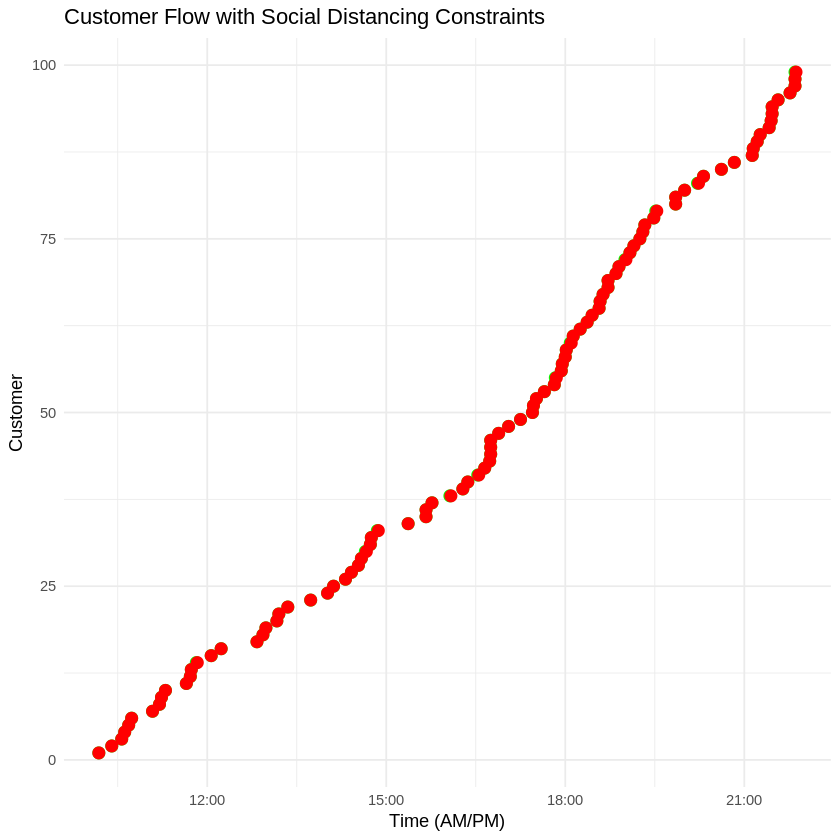

In [162]:
library(ggplot2)

simulate_social_distancing <- function(lambda_arrival, lambda_service, patience_threshold, start_hour, end_hour) {
  # Generate arrival times
  total_minutes <- (end_hour - start_hour) * 60
  arrival_times <- cumsum(rexp(ceiling(lambda_arrival * total_minutes / 60), rate = lambda_arrival / 60))
  arrival_times <- arrival_times[arrival_times <= total_minutes] # Keep arrivals within operating hours

  # Generate service times
  service_times <- rexp(length(arrival_times), rate = lambda_service)

  # Simulate dining with occupancy constraints
  max_tables <- floor(runif(length(arrival_times), min = 2, max = 4)) # Uniform distribution U(2, 3)
  patience <- rexp(length(arrival_times), rate = 1 / patience_threshold)

  start_times <- numeric(length(arrival_times))
  end_times <- numeric(length(arrival_times))
  satisfaction <- logical(length(arrival_times))
  revenue <- 0
  table_free_time <- rep(0, max(max_tables)) # Tracks when each table is free

  for (i in 1:length(arrival_times)) {
    arrival <- arrival_times[i]
    available_tables <- sum(table_free_time <= arrival)

    if (available_tables > 0) {
      # Assign the customer to the next available table
      available_table_index <- which(table_free_time <= arrival)[1]
      start_times[i] <- max(arrival, table_free_time[available_table_index])
      end_times[i] <- start_times[i] + service_times[i]
      table_free_time[available_table_index] <- end_times[i]

      # Check satisfaction
      satisfaction[i] <- (start_times[i] - arrival) <= patience[i]
      revenue <- revenue + 1
    } else {
      # No table available
      start_times[i] <- NA
      end_times[i] <- NA
      satisfaction[i] <- FALSE
    }
  }

  # Convert times to AM/PM format
  arrival_times_formatted <- format(as.POSIXct((start_hour * 60 + arrival_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p")
  start_times_formatted <- ifelse(!is.na(start_times), format(as.POSIXct((start_hour * 60 + start_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p"), NA)
  end_times_formatted <- ifelse(!is.na(end_times), format(as.POSIXct((start_hour * 60 + end_times) * 60, origin = "1970-01-01", tz = "UTC"), "%I:%M %p"), NA)

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:length(arrival_times),
    Arrival = arrival_times_formatted,
    Start = start_times_formatted,
    End = end_times_formatted,
    Waiting_Time = start_times - arrival_times,
    Patience_Threshold = patience,
    Satisfied = satisfaction
  )

  # Summary statistics
  satisfaction_rate <- mean(satisfaction, na.rm = TRUE)
  cat("Summary Statistics:\n")
  cat("Total Revenue (Customers Served):", revenue, "\n")
  cat("Customer Satisfaction Rate:", satisfaction_rate * 100, "%\n")

  return(list(raw_data = raw_data, satisfaction_rate = satisfaction_rate, revenue = revenue))
}

# Simulation Parameters
lambda_arrival <- 10         # 10 customers/hour
lambda_service <- 6          # 6/hour
patience_threshold <- 12     # 12 minutes
start_hour <- 10             # Start at 10:00 AM
end_hour <- 22               # End at 10:00 PM

# Run the simulation
result <- simulate_social_distancing(lambda_arrival, lambda_service, patience_threshold, start_hour, end_hour)

# Output raw data
print(result$raw_data)

# Visualization
plot_simulation <- function(raw_data) {
  ggplot(raw_data[!is.na(raw_data$Start), ]) +
    geom_segment(aes(
      x = as.POSIXct(Arrival, format = "%I:%M %p", tz = "UTC"),
      xend = as.POSIXct(End, format = "%I:%M %p", tz = "UTC"),
      y = Customer, yend = Customer
    ), color = "blue") +
    geom_point(aes(
      x = as.POSIXct(Arrival, format = "%I:%M %p", tz = "UTC"),
      y = Customer
    ), color = "green", size = 3, shape = 21, fill = "green") +
    geom_point(aes(
      x = as.POSIXct(End, format = "%I:%M %p", tz = "UTC"),
      y = Customer
    ), color = "red", size = 3, shape = 21, fill = "red") +
    labs(
      x = "Time (AM/PM)",
      y = "Customer",
      title = "Customer Flow with Social Distancing Constraints"
    ) +
    theme_minimal()
}

# Plot the simulation
plot_simulation(result$raw_data)
